机器学习在许多方面都可以看作是数据科学能力延伸的主要手段。机器学习是用数据科学的计算能力和算法能力去弥补统计方法的不足，其最终结果是为那些目前既没有高效的理论支持，又没有高效的计算方法的统计推理与数据探索问题提供解决方法。   
"机器学习"这个词现在太流行了，仿佛是一种万能药：只要对数据做了机器学习，那么所有问题就都可以迎刃而解！正如你所知，"理想是丰满，现实很骨感"，事实远没那么简单。虽然机器学习仿佛都很强大，但是如果想有效地使用这些方法，必须先掌握每种方法的优缺点，同时还要掌握一些基本的统计概念，例如偏差(bias)和方差(vaiance)、过拟合(overfitting)和欠拟合(underfitting)，等等。   
本章将重点介绍一些机器学习的实用方法，主要使用Python的Scikit-Learn(<http://scikit-learn.org>)程序包。但本章没有全面覆盖机器学习的每个领域——那是一个庞然大物，需要的技术远超本书范围。另外，本章也不是Scikit-Learn程序包(想了解更多关于Scikit-Learn程序包的内容，请参见5.15节)的说明书。本章的主要目标如下。   

* 介绍机器学习的基本术语和概念。
* 介绍Scikit-Learn的API及用法示例。
* 详细介绍一些最重要的机器学习方法的具体用法和使用场景。   

本章的许多内容都源自Scikit-Learn教程和我之前在PyCon、Scipy、PyData和其他学术会议上分享的内容。以下内容都的感谢这么多年以来参会者与合作者的不吝赐教！   
最后，如果你需要升入了解相关技术，那么可以参考5.15节的内容。

## 5.1 什么是机器学习   

在介绍各种机器学习方法之前，线看看究竟什么是机器学习，什么不是机器学习。机器学习经常被归类类人工智能(artificial intelligence)的子领域，但这种归类方法存在误导嫌疑。虽然对机器学习的研究确实是源自人工智能的领域，但是机器学习的方法却应用于数据科学领域，因此，可以认为把机器学习看作是一种数学建模更为合适。   
机器学习的本质就是借助数学模型理解数据。当我们给模型装上可以适应观测数据的可调参数时，"学习"就开始了；此时的程序被认为具有从数据中"学习"的能力。一旦模型可以拟合就得观测数据，那么它们就可以预测并解释新的观测数据。在后面的内容中，我们会分享一些关于这种数学方法的哲学闲话，你会发现数学模型的"学习"过程其实与人脑的"学习"过程相似。   
由于理解机器学习问题的类型对于有效使用各种机器学习工具至关重要，因此首先介绍关于机器学习方法的若干分类。

### 5.1.2 机器学习的分类    

机器学习一般可以分为两类：有监督学习(supervised learning)和无监督学习(unsupervised learning)。    
有监督学习是指对数据的若干标签(类型)之间的关联性进行建模的过程；只要模型被确定，就可以应用到新的未知数据上。这类学习过程可以进一步分为分类(classification)任务与回归(regression)任务。在分类任务中，标签都是离散值；而在回归任务中，标签是连续值。我们会在后面的内容中介绍着两种有监督学习方法。   
无监督学习是指对不带任何标签的数据特征进行建模，通常被看成是一种"让数据自己介绍自己"的过程。这类模型包括聚类(clustering)任务和降维(dimensionality reduction)任务。聚类算法可以将数据分成不同的组别，而降维算法追求用更简洁的方式表现数据。我们同样会在后面的内容中介绍着两种无监督学习方法。   
另外，还有一种半监督学习(semi-supervised learning)方法，结余有监督学习和无监督学习之间。半监督学习方法可以在数据标签不完整时使用。   

### 5.1.2 机器学习应用的定性示例   

下面来介绍一些简单的机器学习任务示例，让这些抽象理论显得更具体一点。这些例子都是我们在后面内容中将要看到的机器学习任务的直观、非量化形式，之后将更深入地介绍相关模型的具体用法。如果想尽早了解这些技术的更多细节，那么请参见在线附录(https://github.com/jakevdp/PythonDataScienceHandbook)中生成下面各个示例中彩图的Python代码。   

1. 分类：预测离散标签   

先来看一个简单的分类任务。假如我们有一些带标签的数据点，希望用这些信息为那些不带标签的数据点进行分类。   
假如这些数据点的分布如图5-1所示(生成这幅图和本节中的其他所有图形的代码都在GitHub的在线附录中)。   
我们看到的是二维数据，也就是说每个数据点都有两个特征，在平面上用数据点的$(x, y)$位置表示。另外，我们的数据点还用一种颜色表示一个类型标签，一共有两种类型，分别用两种颜色表示。我们想根据这些特征和标签创建一个模型，帮助我们判断新的数据点是"蓝色"还是"红色"。

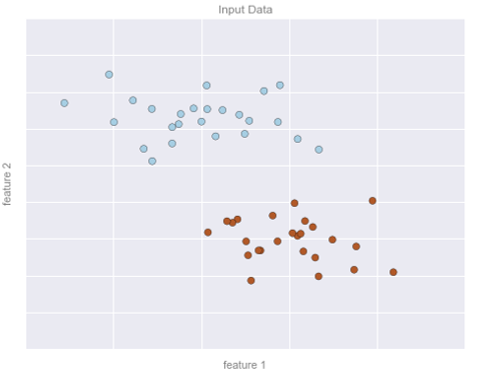

In [1]:
# hide
from IPython.display import Image
Image('D:\\graphs\\Python Data Science Handbook\\Chapter5\\graph5-1.png')

$$\text{图5-1：简单的分类学习数据集}$$   

虽然有许多可以解决分类任务的模型，但是这里还是先用最简单的一种。假设平面上有一条可以将两种类型分开的直线，直线的两侧分别是一种类型。那么，我们的模型其实就是"一条可以将两种分类分开的直线"，而模型参数其实就是直线的位置与方向的数值。这些模型参数的最优解都可以通过学习数据获得(也就是机器学习的"学习")，这个过程通常被称为训练模型。   
图5-2是为这组数据分类而训练的模型。

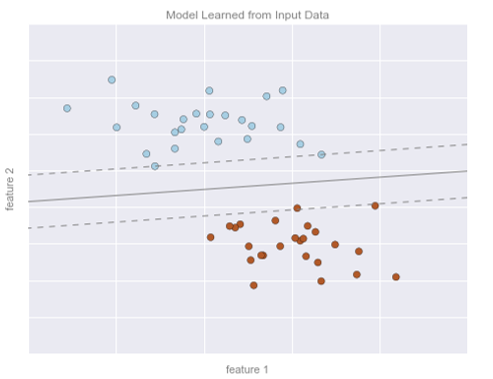

In [2]:
# hide
from IPython.display import Image
Image('D:\\graphs\\Python Data Science Handbook\\Chapter5\\graph5-2.png')

$$\text{图5-2：简单的分类模型}$$   

模型现在已经训练好了，可以对一个新的、不带标签的数据进行分类了。也就是说，我们可以拿一组新数据，把这个模型的直线画在上面，然后根据这个模型为新数据分配标签，这阶段通常被称为预测，如图5-3所示。

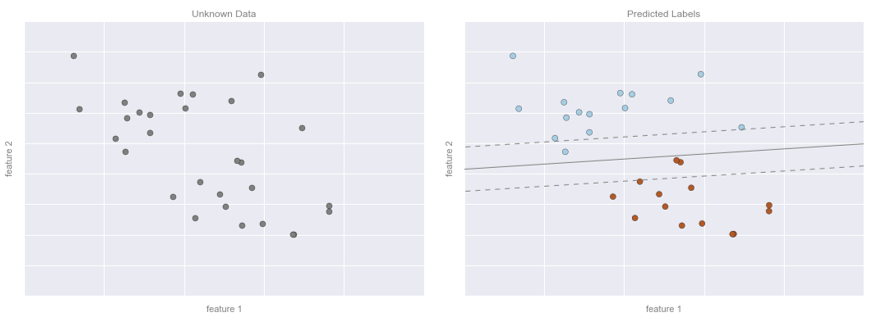

In [3]:
# hide
from IPython.display import Image
Image('D:\\graphs\\Python Data Science Handbook\\Chapter5\\graph5-3.png')

$$\text{图5-3：对新数据应用分类模型}$$    

这就是机器学习中最基本的分类思想，这个"分类"指的是数据具有离散的类型标签。刚一开始，你可能觉得分类非常简单：不就是直接观察数据，然后画一条分割线就可以了。但是，机器学习的真正用途是要解决大型高维度数据集的分类问题。   
以常见的分类任务——垃圾邮件自动识别为例。在这类任务中，我们通常会获得以下特征与标签。   

* **特征1**、**特征1**、$\cdots\cdots$**特征n**$\rightarrow$垃圾邮件关键词与短语出现的频次归一化向量('Viagra'、'Nigerian prince'等)。
* **标签**$\rightarrow$"垃圾邮件"或"普通邮件"。   

在训练数据集中，这些标签可能是人们通过观察少量邮件样本得到的，而剩下的大量邮件需要通过模型来判断标签。一个训练有素的分类算法只要具备足够好的特征(通常是成千上万个词或短语)，就能非常高效地进行分类。5.5节将介绍一个文本分类的例子。   
我们还会详细介绍一些重要的分类算法，包括高斯朴素贝叶斯分类(见5.5节)、支持向量机(见5.7节)，以及随机森林分类(见5.8节)。   

2. 回归：预测连续标签   

下面将要介绍的回归任务与离散标签分类方法相反，其标签是连续值。   
观察如图5-4所示的数据集，所有样本的标签都在一个连续的区间内。   
和前面的分类示例一样，我们有一个二维数据，每个数据点有两个特征。数据点的颜色表示每个点的连续标签。

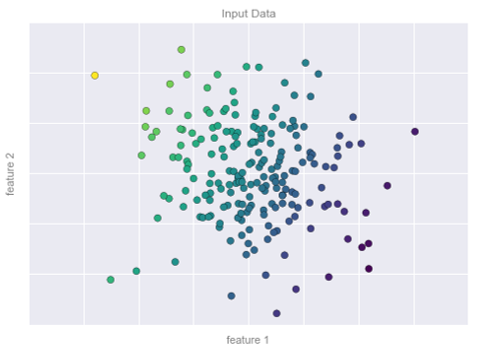

In [1]:
# hide
from IPython.display import Image
Image('D:\\graphs\\Python Data Science Handbook\\Chapter5\\graph5-4.png')

$$\text{图5-4：一个简单的回归数据集}$$    

虽然有许多可以处理这类数据的回归模型，但是我们还是用简单线性回归模型来预测数据，用简单线性回归模型作出假设，如果我们把标签看成是第三个维度，那么就可以将数据拟合成一个平面方程——这就是著名的二维平面上线性拟合问题的高阶情形。   
我们可以将数据可视化成图5-5的形式。

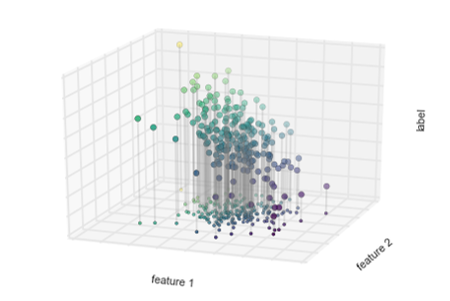

In [2]:
# hide
from IPython.display import Image
Image('D:\\graphs\\Python Data Science Handbook\\Chapter5\\graph5-5.png')

$$\text{图5-5：回归数据的三维视角}$$   

请注意，这里特征1与特征2平面与之前的二维图形是一样的，只不过用了颜色和三维坐标轴的位置来表示标签。通过这个视角，就有理由相信：如果将三维数据拟合成一个平面。就可以对任何输入参数集进行预测。回到原来的二维投影图形上，拟合平面时获得的结果如图5-6所示。

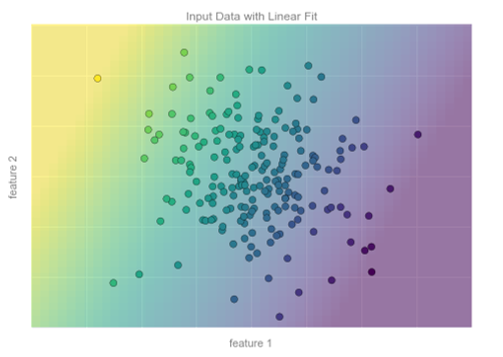

In [3]:
# hide
from IPython.display import Image
Image('D:\\graphs\\Python Data Science Handbook\\Chapter5\\graph5-6.png')

$$\text{图5-6：回归模型的结果}$$   

这个拟合平面为预测新数据点的标签提供了依据。我们可以直观地找到结果，如图5-7所示。

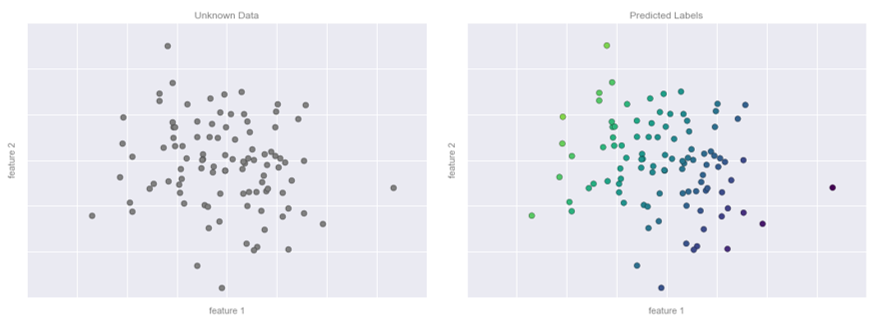

In [4]:
# hide
from IPython.display import Image
Image('D:\\graphs\\Python Data Science Handbook\\Chapter5\\graph5-7.png')

$$\text{图5-7：对新数据应用回归模型}$$   

和之前的分类示例类似，这个回归示例在低维度时看起来可能也非常简单。但是这些方法的真实价值在于，它们可以直截了当地处理包含大量特征的数据集。   
类似的任务有计算通过天文望远镜观测到的星系的距离——在这类任务中，可能会用到以下特征与标签。   

* **特征1**、**特征1**、$\cdots\cdots$**特征n**$\rightarrow$具有若干波长或颜色的星系的亮度。
* **标签**$\rightarrow$星系的距离或红移动(redshift)。   

少量星系的距离可以通过直接观察(通常成本也非常高)进行测量。之后，我们就可以利用适当的回归模型估计其他星系的距离，而不需要为整个星系集合使用昂贵的观察设备。在天文学领域中个，这种问题通常被称为"测光红移"(photometric redshift)。   

我们还会详细介绍一个重要的回归算法，包括线性回归(详见5.6节)、支持向量机(详见5.7节)，以及随机森林回归(详见5.8节)。   

3. 聚类：为无标签数据添加标签   

前面介绍的回归与分类示例都是有监督学习算法，需要建立一个模型来预测新数据的标签。无监督学习涉及的模型将探索没有任何已知标签的数据。   
无监督学习的普遍应用之一就是"聚类"——数据被聚类算法自动分成若干离散的组别。例如，我们有如图5-8所示的一组二维数据。

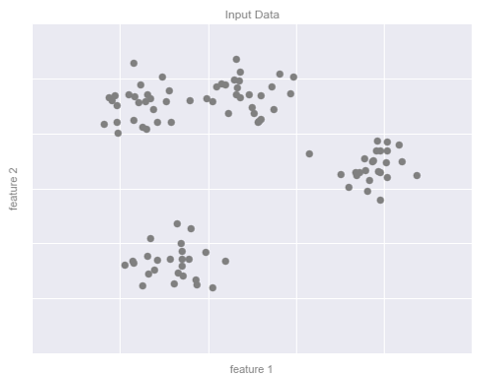

In [5]:
# hide
from IPython.display import Image
Image('D:\\graphs\\Python Data Science Handbook\\Chapter5\\graph5-8.png')

$$\text{图5-9：聚类数据}$$   

仅通过肉眼观察，就可以很清晰地判断出这些点应该归于哪个组。一个聚类模型会根据输入数据的固有结构判断数据点之间的相关性。通过最快、最直观的k-means聚类算法(详见5.11节)，就可以发现如图5-9所示的类簇(cluster)。

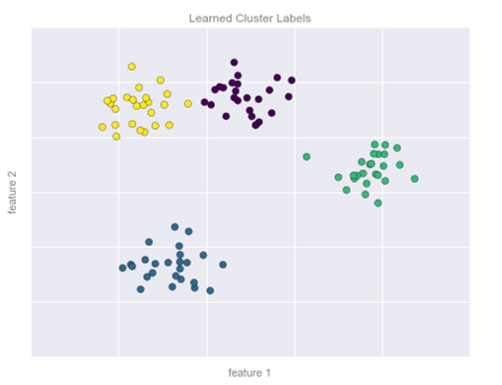

In [6]:
# hide
from IPython.display import Image
Image('D:\\graphs\\Python Data Science Handbook\\Chapter5\\graph5-9.png')

$$\text{图5-9：k-means聚类模型给出的数据标签}$$   

k-means会拟合出一个由$k$个簇中心点构成的模型，最优的簇中心点需要满足簇中的每个点的到该中心的总距离最短。显然，在二维平面上用聚类算法显得非常幼稚，但随着数据集越来越大、维度越来越高，聚类算法对于探索数据集的信息会变得十分有效。   
我们将在5.11节详细介绍k-means聚类算法。其他重要的聚类算法还有高斯混合模型(详见5.12节)和谱聚类(详见Scikit-Learn聚类文档，(<http://scikit-learn.org/stable/modules/clustering.html>))。   

4. 降维：推断无标签数据的结构    

降维是另一种无监督算法示例，需要从数据集本身的结构推断标签和其他信息。虽然降维比之前看到的示例要抽象一些，但是一般来说，降维其实就是在保证高维数据质量的条件下抽取出一个低维数据集。不同的降维算法用不同的方式衡量降维质量，5.10节将介绍这些内容。   
下面用一个示例进行演示，数据如图5-10所示。

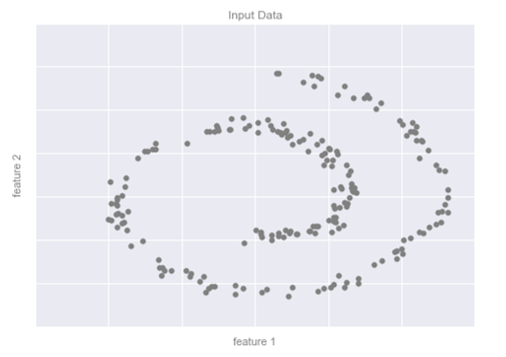

In [7]:
# hide
from IPython.display import Image
Image('D:\\graphs\\Python Data Science Handbook\\Chapter5\\graph5-10.png')

$$\text{图5-10：降维示例数据}$$   

从图中可以清晰看出数据存在某种结构：这些数据点在二维平面上按照一维螺旋整齐地排列。从某种程度上说这些数据"本质上"只有一维，虽然这个一维数据是嵌在高维数据空间里的。适合这个示例的降维模型不仅需要满足数据的非线性嵌套结构，而且还要给出低维表现形式。   
图5-11是通过Isomap算法得到的可视化结果，它是一种专门用于解决这类问题的流形学算法。

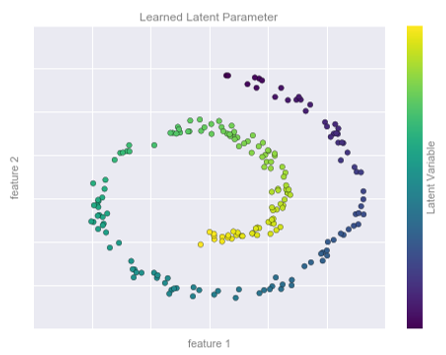

In [8]:
# hide
from IPython.display import Image
Image('D:\\graphs\\Python Data Science Handbook\\Chapter5\\graph5-11.png')

请注意，图中的颜色(表示算法提取到的一维潜在变量)沿着螺旋线呈现均匀变化，表明这个算法的确发现了肉眼所能观察到的结构。和之前介绍的示例类似，降维算法同样要在处理高维数据时才能大展拳脚。例如，我们可能需要对一个包含100或1000个特征的数据集内部的关联性进行可视化。要对一个1000维的数据进行可视化是个巨大的挑战，一种解决办法就是通过降维技术，让我们可以在更容易处理的二维或三维空间中对数据进行可视化。  
我们还会详细介绍一些重要的降维算法，包括主成分分析(参见5.9节)和各类中流形学习算法，如Isomap算法、局部线性嵌入算法(详见5.10节)。   

### 5.1.3 小结   

前面介绍了一些机器学习方法基本类型的示例。虽然我们略过了许多重要的实践细节，但我还是希望这节的内容可以让你对应机器学习方法解决问题的基本思路有所了解。   
综上所述，本节介绍的主要有以下内容。   

有监督学习： 可以训练带标签的数据以预测新数据标签的模型。   
分类：可以预测两个或多个离散分类标签的模型。   
回归：可以预测连续标签的模型。   
无监督学习：识别无标签数据结构的模型。   
聚类：检测、识别数据显著组别的模型。   
降维：从高维数据中检测、识别低维数据结构的模型。   

后面的内容将会深入介绍各个类型的具体算法，并且通过一些有趣的示例说明这些算法的使用场景。   

前面内容中的所有图形都是通过真实的机器学习计算实现的。所有图形的生成代码都位于在线文档(<http://github.com/jakevdp/PythonDataScienceHandnook>)中。

## 5.2 Scikit-Learn简介   

目前，Python有不少可以实现各种机器学习算法的程序库。Scikit-Learn(<http://scikit-learn.org>)是最流行的程序包之一，它为各种常用机器学习算法提供了高效版本。Scikit-Learn不仅因其干净、统一、管道命令式的API而独具特色，而且它的在线文档又实用、有完整。这种统一性的好处是，只要你掌握了Scikit-Learn一种模型的基本用法和语法，就可以非常平滑地过渡到新的模型或算法上。   
本节内容对Scikit-Learn的API进行概述。真正理解这些API的组成部分将对更深入地理解机器算法与技巧大有裨益。   
首先介绍Scikit-Learn的数据表示(data representation)，然后介绍评估器API(Estimator API)，最后通过一个有趣的示例演示如何用这些工具探索手写数字图像。   

### 5.2.1 Scikit-Learn的数据表示    

机器学习是从数据创建模型的学问。因此你首先需要了解怎样表示数据才能让计算机理解。Scikit-Learn认为数据表示最好的方法就是用数据表的形式。   

1. 数据表   

基本的数据表就是二维网格数据，其中的每一行表示数据集中的每个样本，而列表示构成每个样本的相关特性。例如Ronald Fisher在1936年底鸢尾花数据集(<https://wikipedia.org/wiki/Iris_flower_data_set>)的经典分析。我们用Searborn程序库(<https://en.wikipedia.org/wiki/Iris_flower_data_set>)的经典分析。我们用Seaborn程序库(<https://stanford.edu/~mwaskom/software/seaborn/>)下载数据并加载到Pandas的DataFrame中：

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


其中的每行数据表示没朵被观察的鸢尾花，行数表示数据集中记录的鸢尾花总数，一般情况下，会将这个矩阵的行称为样本(sample)，行数记为n_sample。   
同样，每列数据表示每个样本某个特征的量化值。一般情况下，会将矩阵的列称为特征(feature)，列数记为n_feature。   

2. 特征矩阵   

这个表格布局通过二维数组或矩阵的形式将信息清晰地表达出来，所以我们通常把这类矩阵称为特征矩阵(features matrix)。特征矩阵通常被简记为变量$x$。它是维度为[n_samples, n_features]的二维矩阵，同城可以用NumPy数组或Pandas的DataFrame来表示，不过Scikit-Learn也支持SciPy的稀疏矩阵。   
样本(即每一行)通常是指数据集中的每个对象。例如，样本可能是一朵花、一个人、一篇文档、一幅图像，或者一首歌、一部影片、一个天体，甚至是任何可以通过一组量化方法进行测量的实体。   
特征(即每一列)通常是指每个样本具有的某种量化观测值。一般情况下，特征都是实数，但有时也可能是布尔类型或者离散型。  

3. 目标数组   

除了特征矩阵$x$之外，我们还需要一个标签或目标数组，通常简记为$y$。目标数组一般是一维数组，其长度就是样本总数n_samples，通常都用一维的NumPy数组或Pandas的Series表示。目前数组可以是连续的数值类型，也可以是离散的类型、标签。虽然有些Scikit-Learn的评估器可以处理具有多目标值的二维[n_sample, n_targets]目标数组，但此处基本上只涉及常见的一维目标数组问题。   
如何区分目标数组的特征与特征矩阵中的特征列，一直是个问题。目标数组的特征通常是我们希望从数据中预测的量化结果；借用统计学的的术语，$y$就是因变量。以前面的示例数据为例，我们需要通过其他观测值来建立模型，预测画的品种(species)，而这里的species列就可以看成是目标数组。   
知道这一列是目标数组之后，就可以用Seaborn(详见4.16节)对数据机芯可视化了(如图5-12所示)：

In [2]:
X_iris = iris.drop('species', axis = 1)
X_iris.shape

(150, 4)

In [3]:
y_iris = iris['species']
y_iris.shape

(150,)

C:\Users\dowjohn\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


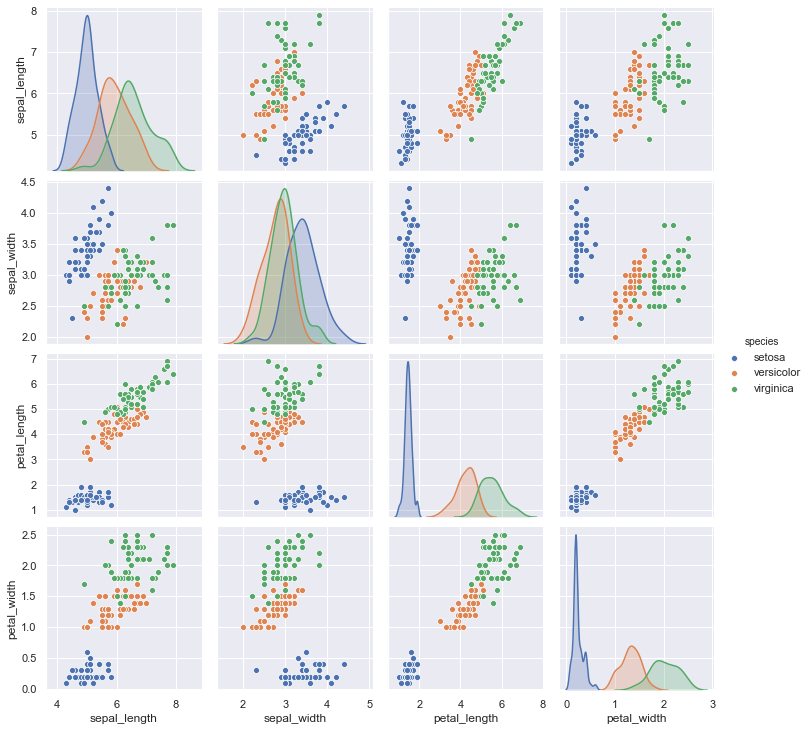

In [4]:
import seaborn as sns
sns.set()

sns.pairplot(iris, hue = 'species', size = 2.5);

$$\text{图5-12：鸢尾花数据集的可视化}$$  

特征矩阵和目标数组的布局如图5-13所示。

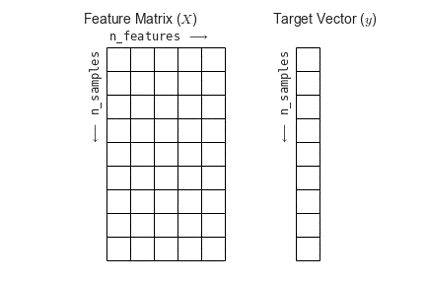

In [6]:
# hide
from IPython.display import Image
Image('D:\\graphs\\Python Data Science Handbook\\Chapter5\\graph5-13.png')

$$\text{图5-13：Scikit-Learn数据表布局}$$   

有了适当的数据形式之后，就可以开始学习Scikit-Learn的评估器API了。   

### 5.2.2 Scikit-Learn的评估器API    

Scikit-Learn API主要遵照以下设计原则，Scikit-Learn API文档对此有所概述。   

* 统一性：所有对象使用共同接口连接一组方法和统一的文档。
* 内省：所有参数值都是功能属性。
* 限制对象层级：只有算法可以用Python类表示。数据集都用标准数据类型(NumPy数组、Pandas DataFrame、SciPy稀疏矩阵)表示，参数名称用标准的Python字符串。
* 函数组合：许多机器学习任务都可以用一串基本算法实现，Scikit-Learn尽力支持这种可能。
* 明智的默认值：当模型需要用户设置参数时，Scikit-Learn预先定义适当的默认值。   

只要你理解了这些设计原则，就会发现Scikit-Learn非常容易使用。Scikit-Learn中所有机器学习算法都是通过评估器API实现的，它为各种机器学习应用提供了统一的接口。   

1. API基础知识   

Scikit-Learn评估器API的常用步骤如下所示(后面介绍的示例都是按照这些步骤进行的)。   
(1) 通过从Scikit-Learn中导入适当的评估器类，选择模型类。
(2) 用合适的数值对模型类进行实例化，配置模型超参数(hyperparameter)。
(3) 整理数据，通过前面介绍的方法获取特征矩阵和目标数组。
(4) 调用模型实例的fit()方法对数据进行拟合。
(5) 对新数据应用模型：    
    * 在有监督学习模型中，通常使用predict()方法预测新数据的标签；
    * 在无监督学习模型中，通常使用transform()或predict()方法转换或推断数据的性质。   
下面按照步骤来演示几个使用了有监督学习方法和无监督学习方法的示例。   

2. 有监督学习示例：简单线性回归   

让我们来演示一个简单线性回归的建模步骤——最常见的任务就是为散点数据集$(x, y)$拟合一条直线。我们将使用下面的样本数据来演示这个回归示例(如图5-14所示)：

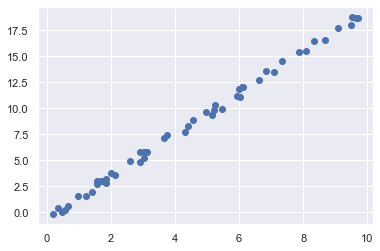

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.random(50)
plt.scatter(x, y);

$$\text{图5-14：线性回归样本数据}$$   

有了数据，就可以将前面介绍的步骤付诸实现了，先一步步来。   

(1) 选择模型类   

在Scikit-Learn中，每个模型类都是一个Python类。因此，假如我们想要计算衣蛾简单线性回归模型，那么可以直接导入线性回归模型类：   

In [6]:
from sklearn.linear_model import LinearRegression

 除了简单线性模型，常用的线性模型还有许多，具体内容请参考sklearn.linear_model模块文档(<http://scikit_learn.org/stable/nodules/linear_model.html>)。

(2) 选择模型超参数   

请注意，模型类与模型实例不同。   
当我们选择了模型类之后，还有许多参数需要配置。根据不同模型的不同情况，你可能需要回答以下问题。   

* 我们想要拟合偏移量(即直线的截距)吗？
* 我们需要对模型进行归一化处理吗？
* 我们需要对特征进行预处理以提高模型灵活性吗？
* 我们打算在模型中使用哪种正则化类型？
* 我们打算使用多少模型组件(component)？   

有一些重要的参数必须在选择模型类时确定好。这些参数通常被称为超参数，即在模型拟合数据之前必须被确定的参数。在Scikit-Learn中，我们通常在模型初始化阶段选择超参数。5.3节将介绍如何定量地选择超参数。   
对于现在这个线性回归示例来说，可以实例化LinearRegressio类并用fit_intercept超参数设置是否想要拟合直线的截距：

In [7]:
model = LinearRegression(fit_intercept = True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

需要注意的是，对模型进行实例化其实仅仅是存储了超参数的值。我们还没有将模型应用到数据上：Scikit-Learn的API对选择模型和将模型应用到数据区别得很清晰。   

(3) 数据整理成特征矩阵和目标数组    

前面介绍了Scikit-Learn的数据表示方法，它需要二维特征矩阵和一维目标数组。虽然我们的目标数组已经有了$y$(长度为n_samples的数组)，但还需要将数据$x$整理成[n_samples, n_features]的形式。在这个示例中，可以对一维数组进行简单的维度变换：

In [8]:
X = x[:, np.newaxis]
X.shape

(50, 1)

(4) 用模型拟合数据   

现在就可以将模型应用到数据上，这一步通过模型的fit()方法即可完成：

In [9]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

fit()命令会在模型内部进行大量运算，运算结果将存储在模型属性中，共用户使用。在Scikit-Learn模型中，所有通过fit()方法获得的模型参数都带一条下划线。例如，在线性回归模型中，模型参数如下所示：

In [10]:
model.coef_

array([2.00660766])

In [11]:
model.intercept_

-0.5350275750800026

这两个参数分别表示对样本数据拟合直线的斜率和截距。与前面样本数据的定义(斜率2、截距-1)进行对比，发现拟合结果与样本非常接近。   
模型参数的不确定性是机器学习经常遇到的问题。一般情况下，Scikit-Learn不会为用户提供直接从模型参数获得结论的工具；与其将模型参数解释为机器学习问题，不如说它更像统计建模问题。机器学习的重点并不是模型的预见性。如果你想要对模型拟合参数的意义和其他相关参数分析工具有更深入理解，请参考statsModel Python程序包(<http://statsmodels.source.net/>)。

(5) 预测新数据的标签   

模型训练出来之后，在监督机器学习的主要任务就变成了对不属于训练集的新数据进行预测。在Scikit-Learn中，我们用predict()方法进行预测。"新数据"是特征矩阵的$x$坐标值，我们需要用模型预测出目标数组的$y$轴坐标：

In [12]:
xfit = np.linspace(-1, 11)

首先，将这些$x$值转换为[n_samples, n_features]的特征矩阵形式，之后将其输入到模型中：

In [13]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

最后，原始数据和拟合结果都可视化出来(如图5-15所示)：

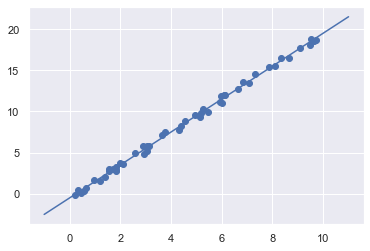

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

$$\text{图5-15：一个简单的线性回归数据结果}$$   

通常都是用一些基准指标来验证模型的学习效果，我们将在下面的示例中介绍这些指标。

3. 有监督学习示例：鸢尾花数据分类   

再介绍一个由监督学习示例，还是用前面介绍过的鸢尾花数据集。这个示例的问题是：如何为鸢尾花数据集建立模型，先用一部分数据进行训练，再用模型预测出其他样本的标签？   
我们将使用非常简单的高斯朴素贝叶斯(Gaussian naive Bayes)方法完成这个任务。这个方法假设每个特征中属于每一类的观测值都符合高斯分布(详见5.5节)。因此高斯朴素贝叶斯方法速度很快，而且不需要选择超参数，所以通常很适合作为初步分类手段，在借助更复杂的模型进行优化之前使用。   
由于需要用模型之前没有接触过的数据评估它的训练效果，因此得先将数据分割成训练集(training set)和测试集(testing set)。虽然完全可以手动实现分割数据集，但是借助train_test_split函数会更方便：

In [15]:
# from sklearn.corss_validation import train_test_split 
# sklearn.cross_validation has been deprecated. The function train_test_split can now be found here:

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                               random_state = 1)

整理好数据之后，用下面的模型来预测标签：

In [16]:
from sklearn.naive_bayes import GaussianNB  # 1.选择模型类
model = GaussianNB()                        # 2.初始化模型
model.fit(Xtrain, ytrain)                   # 3.用模型拟合数据
y_model = model.predict(Xtest)              # 4.对新数据进行预测

最后，用accuracy_score工具验证模型预测结果的准确率(预测的所有结果中，正确结果占总预测样本数的比例)：

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

准确率竟然高达97%，看来即使是非常简单的分类算法也可以有效地学习这个数据集！   

4. 无监督学习示例：鸢尾花数据降维   

本节将介绍一个无监督学习问题——对鸢尾花数据集进行降维，以便能更方便地对数据进行可视化。前面介绍过，鸢尾花数据集由四个维度构成，即每个样本都有四个维度。   
降维的任务是要找到一个可以保留数据本质特征的低维矩阵来表示高维数据。降维通常用于辅助数据可视化的工作，毕竟用二维数据画图比用四维甚至更高维的数据画图更方便！   
下面将使用主成分分析(principal component analysis，PCA，详见5.9节)方法，这是一种快速线性降维技术，我们将用模型返回两个主成分，也就是用二维数据表示鸢尾花的四维数据。   
同样按照前面介绍过的建模步骤进行：

In [19]:
from sklearn.decomposition import PCA   # 1.选择模型类
model = PCA(n_components = 2 )               # 2.设置超参数，初始化模型
model.fit(X_iris)                       # 3.拟合数据，注意这里不用y变量
X_2D = model.transform(X_iris)          # 4.将数据转换成二维

现在来画出结果。快速处理方法就是先将二维数据插入到鸢尾花的DataFrame中，然后用Seaborn的lmplot方法画图(如图5-16所示)：

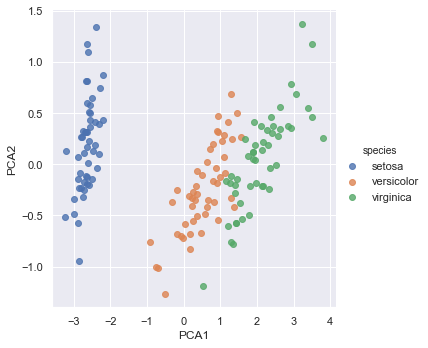

In [20]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', hue = 'species', data = iris, fit_reg = False);

$$\text{图5-16：鸢尾花数据的二维投影}$$   

从二维数据表示图可以看出，虽然PCA算法根本不知道花的种类标签，但不同种类的花还是被很清晰地区分开来！这表明用一种比较简单的分类方法就能够有效地学些这份数据集，就像前面看到的那样。

5. 无监督学习示例：鸢尾花数据聚类   

再看看如何对鸢尾花数据进行聚类。聚类算法是要对没有任何标签的数据集进行分组。我们将用一个强大的聚类方法——高斯混合模型(Gaussian mixture model，GMM)，具体细节将在5.12节中介绍。GMM模型试图将数据构造成若干服从高斯分布的概率密度函数簇。   
用以下方法拟合高斯混合模型：

In [23]:
# from sklearn.mixture import GMM         
# model = GMM(n_component = 3,
#            covariance_type = 'full')    # 该命令(GMM)已被废止

from sklearn import mixture                              # 1.选择模型类
model = mixture.GaussianMixture(n_components=3, 
                                 covariance_type='full') # 2.设置超参数，初始化模型

model.fit(X_iris)                       # 3.拟合数据，主要不需要y变量
y_gmm = model.predict(X_iris)           # 4.确定簇标签

和之前一样，将簇标签添加到鸢尾花的DataFrame中，然后用Seaborn画出结果(如图5-17所示)：

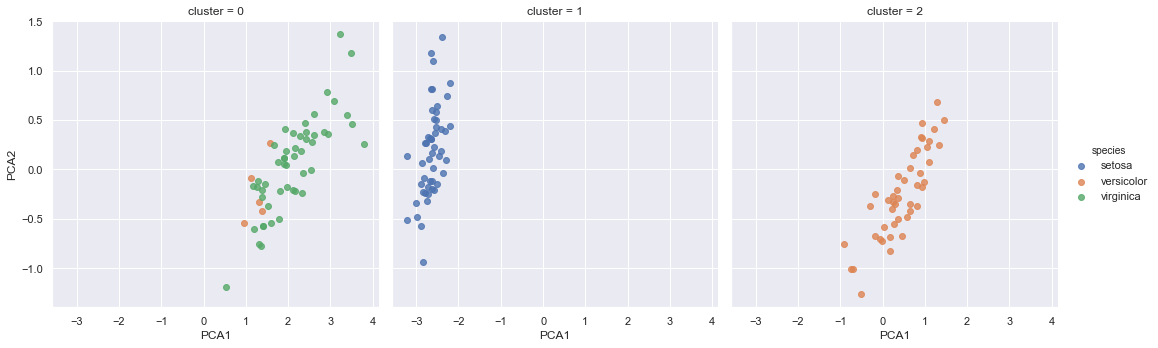

In [24]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data = iris, hue = 'species',
          col = 'cluster', fit_reg = False);

$$\text{图5-17：GMM算法对鸢尾花数据的聚类结果}$$   

根据簇数量地数据进行分割，就会清晰地发现GMM算法的训练效果：setosa(山鸢尾花)类的话在簇0中被完美地区分出来，唯一的遗憾是第三幅图中versicolor(变色鸢尾花)和virginical(维吉尼亚鸢尾花)还有一点混淆。这就说明，即使没有专家告诉我们每朵花的具体种类，但由于每种花的特征差异很大，因此我们也可以通过简单的聚类算法自动识别出不同种类的花！这种算法还可以帮助专家们探索观察样本之间的关联性。

### 5.2.3 应用：手写数字探索    

为了将前面介绍的内容应用到更有趣的问题上，我们来挑战一个光学字符识别问题：手写数字识别。简单点说，这个问题包括图像中字符的定位和识别两部分。为了演示方便，我们选择使用Scikit-Learn中自带的手写数字数据集。   

1. 加载并可视化手写数字   
首先用Scikit-Learn的数据获取接口加载数据，并简单统计一下：

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

这份图形数据是一个三维矩阵：共有1797个样本，每张图像是8像素$\times$8像素。对前100张图进行可视化(如图5-18所示)：

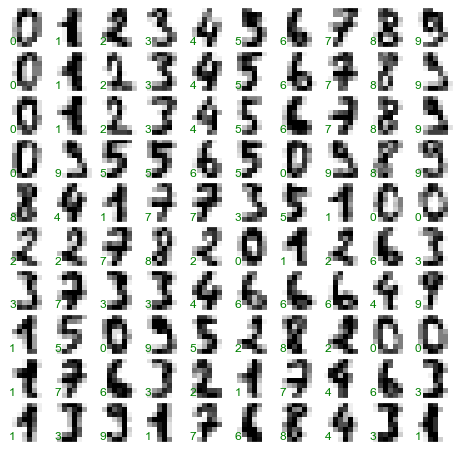

In [27]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize = (8, 8),
                        subplot_kw = {'xticks':[], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform = ax.transAxes, color = 'green')

$$\text{图5-18：手写数字数据集，每个样本8像素$\times$8像素}$$   

为了在Scikit-Learn中使用数据，需要一个维度为[n_samples, n_features]的二维特征矩阵——可以将每个样本图像所有像素都作为特征，也就是将每个数字的8像素$\times$8像素平铺成长度为64的一维数组。另外，还需要一个目标数组，用来表示每个数字的真实值(标签)。这两份数据已经放在手写数字数据集的data与target属性中，直接使用即可：

In [28]:
X = digits.data
X.shape

(1797, 64)

In [29]:
y = digits.target
y.shape

(1797,)

从上面代码可以看出，一共有1797个样本和64个特征。   

2. 无监督学习：降维   

虽然我们想对具有64维参数空间的样本进行可视化，但是在如此高维度的空间中进行可视化十分困难。因此，我们需要借助无监督学习将维度降到二维。这次试试流形学习算法中的Isomap(详见5.10节)算法对数据进行降维：

In [31]:
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

现在数据已经投影到二维。把数据画出来，看看从结构中能发现什么(如图5-19所示)：

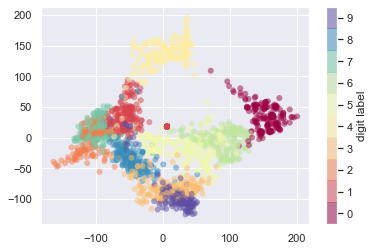

In [33]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c = digits.target,
           edgecolor = 'none', alpha = 0.5,
           cmap = plt.cm.get_cmap('Spectral', 10))    
plt.colorbar(label = 'digit label', ticks = range(10))
plt.clim(-0.5, 9.5);

$$\text{图5-19：经Isomap算法处理后的手写数字}$$   

这幅图呈现出了非常直观的效果，让我们知道数字在64维空间中的分离(可识别)程度。例如，在参数空间中，数字0(黑色)和数字1(紫色)基本不会重叠。根据常识也是如此；数字0是中间一片空白，而数字1是中间一片黑。另外，从图中会发现，数字1和数字4还想有点混淆——也许是有些人写数字1的时候喜欢在上面加个"帽子"，因此看起来就像是数字4。   
虽然有些瑕疵，但从总体上看，各个数字在参数空间中的分离程度还是令人满意的。这其实告诉我们：用一个非常简单的有监督分类算法就可以完成任务了。下面来演示一下。   

3. 数字分类   

我们需要找到一个分类算法，对手写数字进行分类。和前面学习鸢尾花数据一样，先将数据分成训练集和测试集，然后用高斯朴素贝叶斯模型来拟合：

In [34]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)

In [35]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

模型预测已经完成，现在用模型在训练集中的正确识别样本量与总训练样本量进行对比，获得模型的准确率：

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

可以看出，通过一个非常简单的模型，数字识别率就可以达到80%以上！但仅依靠这个指标，我们无法知道模型哪里做得不够好，解决这个问题的办法就是用混淆矩阵(confusion matrix)。可以用Scikit-Learn计算混淆矩阵，然后用Seaborn画出来(如图5-20所示)：

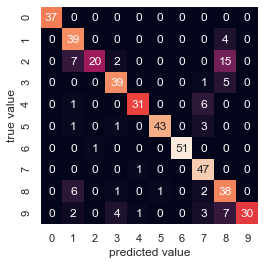

In [39]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value');

$$\text{图5-20：用混淆矩阵显示分类器误判率}$$   

从图中可以看出，误判的主要原因在于许多数字2被误判成了数字1或数字8。另一种显示模型特征的直观方式是将样本画出来，然后把预测标签放在左下角，用绿色表示预测正确，用红色表示预测错误(如图5-21所示)：

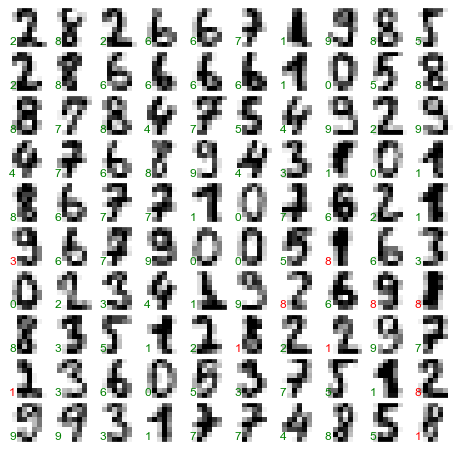

In [42]:
fig, axes = plt.subplots(10, 10, figsize = (8, 8),
                        subplot_kw = {'xticks':[], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
           transform = ax.transAxes,
           color = 'green' if (ytest[i] == y_model[i]) else 'red')

$$\text{图5-21：正确(绿色)与错误(红色)预测标签，彩图请看在线附录(<https://github.com/jakevdp/PythonDataScienceHandbook>)}$$   

通过观察这部分样本数据，我们能知道模型哪里的学习不够好。如果希望分类准确率达到80%以上，能需要更为复杂的算法，例如支持向量机(详见5.7节)、随机森林(详见5.8节)，或者其他分类算法。   

### 5.2.4 小结    

本节介绍了Scikit-Learn中数据表示方法和评估器API的基本特征。除了评估器的类型不同，导入模型/初始化模型/拟合数据/预测数据的步骤是完全相同的。对评估器API有了基本认识之后，你可以参考Scikit-Learn文档继续学习更多知识，并在你的数据上尝试不同的模型。   
从下一节开始学习的内容可能是机器学习中最重要的部分，那就是模型选择与模型验证。

## 5.3 超参数与模型验证    

在上一节中，我们介绍了有监督学习模型的基本步骤：

(1) 选择模型类；   
(2) 选择模型超参数；   
(3) 用模型拟合训练数据；   
(4) 用模型预测新数据的标签。     

前两步——模型选择和超参数选择——可能是有效使用各种机器学习工具和技术的最重要阶段。为了作出正确的选择，我们需要一种方式来验证选中的模型和超参数是否可以很好地拟合数据。这看起来很简单，但要顺利完成必须避开很多坑。

### 5.3.1 什么是模型验证    

模型验证(model validation)其实很简单，就是在选择模型和超参数之后，通过对训练数据进行学习，对比模型对已知数据的预测值与实际值的差异。   
在下面的几节中，我们首先通过一个简单方法实现模型验证，告诉你为什么那样做行不通。之后，介绍如何利用留出集(holdout set)与交叉检验(cross-validation)实现更可靠的模型验证。   

1. 错误的模型验证方法    
让我们再用前面介绍过的鸢尾花数据来演示一个简单的模型验证方法，首先加载数据：

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

然后选择模型和超参数。这里使用一个$k$近邻分类器，超参数为n_neighbors = 1。这是一个非常简单直观的模型，"新数据的标签与其最接近的训练数据的标签相同"：

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)

然后训练模型，并用它来预测已知标签的数据：

In [3]:
model.fit(X, y)
y_model = model.predict(X)

最后，计算模型的准确率：

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

准确得分是1.0，也就是说模型识别标签的正确率是100%！但是这样测量的准确率可靠吗？我们真的有一个在任何时候准确率都是100%的模型吗？   
你可能已经猜到了，答案是否定的。其实这个方法有个根本的缺陷：它用同一套数据训练和评估模型。另外，最近邻模型是一种与距离相关的评估器，只会简单地存储训练数据，然后把新数据与存储点的已知数据进行对比来预测标签。在理想情况下，模型的准确率总是100%。   

2. 模型验证正确方法：留出集   

那怎样才能正确进行模型验证呢？其实留出集可以更好地评估模型性能，也就是说，先从训练模型的数据中留出一部分，然后用这部分留出来的数据来验证模型性能。在Scikit-Learn里面用train_test_split工具可以实现：

In [6]:
from sklearn.model_selection import train_test_split

# 每个数据集分一半数据
X1, X2, y1, y2 = train_test_split(X, y, random_state = 0,
                                 train_size = 0.5)

# 用模型拟合训练数据
model.fit(X1, y1)

# 在测试集中评估模型准确率
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

这样就可以获得更合理的结果了：最近邻分类器在这份留出集上的准确率是90%。这里的留出集类似新数据，因为模型之前没有"接触"过它们。   

3. 交叉验证   

用留出集进行模型验证有一个缺点，就是模型失去了一部分训练机会。在上面的模型中，有一半数据都没有为模型做出贡献。这显然不是最优解，而且可能还会出现问题——尤其是在训练数据集规模比较小的时候。   
解决这个问题的方法是交叉验证，也就是做一组拟合，让数据的每个自己既是训练集，又是验证集。用图形来说明的话，就是如图5-22所示。

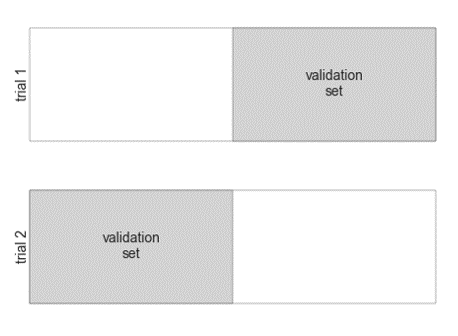

In [7]:
# hide
from IPython.display import Image
Image('D:\\graphs\\Python Data Science Handbook\\Chapter5\\graph5-22.png')

$$\text{图5-22：两轮交叉验证}$$   

这里进行了两轮验证实验，轮流用一半数据作为留出来。如果还有前面的数据集，我们可以这样实现交叉检验：

In [8]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

这样就可以获得两个准确率，将二者结合(例如求均值)获取一个更准确的模型总体性能。这种形式的交叉检验被称为两轮交叉检验——将数据分成两个子集，依次将每个子集作为验证集。   
可以通过扩展这个概念，在数据中实现更多轮的实验，例如图5-23是一个五轮交叉检验。

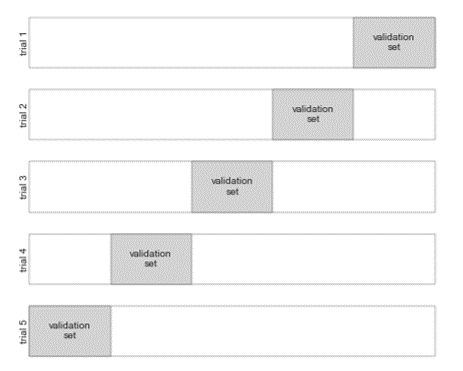

In [9]:
from IPython.display import Image
Image('D:\\graphs\\Python Data Science Handbook\\Chapter5\\graph5-23.png')

$$\text{图5-23：五轮交叉检验}$$   

把数据分成五组，每一轮依次用模型拟合其中的四组数据，再预测第五组数据，评估模型准确率。手动实现这些过程会很无聊，用Scikit-Learn的cross_val_score函数可以非常简便地实现：

In [17]:
# from sklearn.cross_validation import corss_val_score  
# cross_validation is deprecated since version 0.18. This module will be removed in 0.20. 
# Use from sklearn.model_selection import cross_validate.

from sklearn.model_selection import cross_validate

CV = cross_validate(model, X, y, cv = 5)
CV['test_score']

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

对数据的不同子集重复进行交叉检验，可以让我对算法的性能有更好的认识。   
Scikit-Learn为不同应用场景提供了各种交叉检验方法，都以迭代器(iterator)形式在cross_validation模块中实现(**注：** 从Scikit-Learn0.18版起，开始用model_selection模块代替cross_validation模块，并计划在0.20版本中移除程序包，部分交叉检验类的用法也可能发生变化，本书按照作者原文保留cross_validation，建议读者使用作者建议的版本运行本书代码。)。例如，我们可能会遇到交叉检验的轮数与样本数相同的极端情况，也就是说我们每次只有一个样本做测试，其他样本全用于训练。这种交叉检验类型被称为LOO(leave-one-out，只留一个)交叉检验，具体用法如下：

In [23]:
from sklearn.model_selection import LeaveOneOut
scores = cross_validate(model, X, y, cv = LeaveOneOut())
scores['test_score']

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

由于我们有150个样本，留一伐交叉验证会生成150轮试验，每次试验的预测结果要么成功(得分1.0)，要么失败(得分0.0)。计算所有试验准确率的均值就可以得到模型的预测准确性了：

In [24]:
scores['test_score'].mean()

0.96

其他交叉检验机制的用法大同小异。想了解更多关于Scikit-Learn交叉检验的内容，可以用IPython探索sklearn.model_selection子模块，也可以浏览Sdikit-learn的交叉检验文档(<http://scikit-learn.org/stable/modeules/cross_validation.html>)。

### 5.3.2 选择最优模型    

现在已经介绍了验证与交叉检验的基础知识，让我们更进一步，看看如何悬着模型和超参数，这是机器学习实践中国最重要的部分，但是学过的机器学习入门教程都一笔带过了这些内容。   

关键问题时：假如模型效果不好，应该如何改善？答案可能有以下几种。   

* 用更复杂/更灵活的模型。
* 用更简单/更确定的模型。
* 采集更多的训练样本。
* 为每个样本采集更多的特征。   

问题的答案往往与直觉相悖。换一种更复杂的模型有时可能产生更差的结果，增加更多的训练样本也未必能改善性能！改善模型能力的高低，是区分学习时间者成功与否的标志。   

1. 偏差与方差的均衡   

"最优模型"的问题基本可以看成是找出偏差与方差平衡点的问题。图5-24显示的是对同一数据集拟合的两种回归模型。

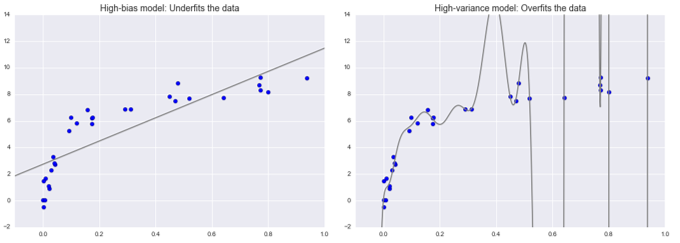

In [27]:
Image('D:\\graphs\\Python Data Science Handbook\\Chapter5\\graph5-24.png')

$$\text{图5-24：高偏差与高方差回归模型}$$   

显然，这两个模型拟合的都不是很好，但它们的问题却是不一样的。   
左边的模型希望从数据中找到一条直线。但由于数据本质上比直线要复杂，直线永远不可能很好地描述这份数据。这样的模型被认为是对数据欠拟合的：也就是说，模型没有足够的灵活性来适应数据的所有特征。另一种说法就是模型具有高偏差。   
右边的模型希望用高阶多项式拟合数据。虽然这个模型有足够的灵活性可以近乎完美地适应数据的所有特征，但与其说它是十分准确地描述了训练数据，不如说它是过多地学习了数据的噪音，而不是数据的本质属性。这样的模型被认为是对数据过拟合，也就是模型过于灵活，在适应数据所有特征的同时，也适应的随机误差。另一种说法就是模型具有高方差。   
再换个角度，如果用两个模型分别预测$y$轴的数据，看看是什么效果。在图5.25中，浅红色的点是被预测数据集遗漏的点。   

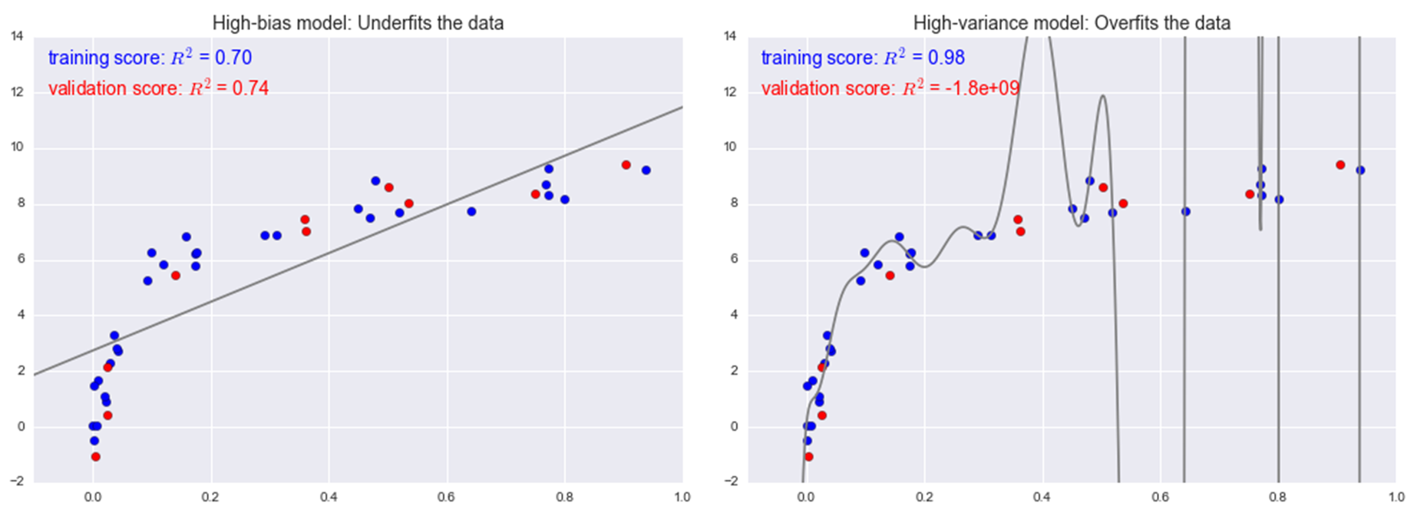

In [26]:
Image('D:\\graphs\\Python Data Science Handbook\\Chapter5\\graph5-25.png')

$$\text{高偏差与高方差模型的训练得分与验证得分}$$  

这个分数是$R^2$，也称为判定系数(<https://en.wikipedia.org/wiki/Coefficient_of_determination>)，用来衡量模型与目标值均值的对比结果。$R^2=1$表示模型与数据完全吻合，$R^2=0$表示模型不比简单取均值更好，$R^2$为负表示模型性能很差。从这两个模型的得分可以得出两条一般性的结论。   

* 对于高偏差模型，模型在验证集的表现与在训练集的表现类似。
* 对于高方差模型，模型在验证集的表现远远不如在训练集的表现。   

如果我们有能力不断调整模型的复杂度，那么我们可能希望训练得分和验证得分如图5-26所示。

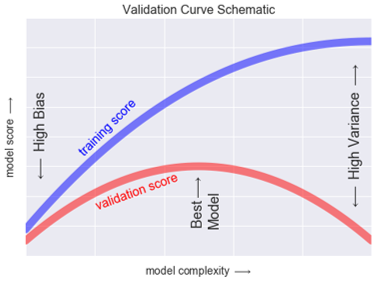

In [28]:
Image('D:\\graphs\\Python Data Science Handbook\\Chapter5\\graph5-26.png')

$$\text{图5-26：模型复杂度、训练得分与验证得分的方法关系图}$$   

不同模型复杂度的调整方法大不相同。后文在深入介绍各种模型时，就会讲解每种模型的调整方法。   

2. Scikit-Learn验证曲线   

下面来看一个例子，用交叉检验计算一个模型的验证曲线。这里用多项式回归模型，它是线性回归模型的一般形式，其多项式的次数是一个可调参数。例如，多项式次数为1其实就是讲数据拟合成一条直线。若模型有参数$a$和$b$，则模型为：
$$y = ax + b$$
多项式次数为3，则是将数据拟合成一条三次曲线。若模型有参数$a$、$b$、$c$、$d$，则模型为：   
$$y = ax^3 + bx^2 + cx + d$$
推而广之，就可以得到任意次数的多项式。在Scikit-Learn中，可以用一个带多项式预处理器的简单线性回模型实现。我们用一个管道命令来组合这两种操作(多项式特征与管道命令将在5.4节介绍)：

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))
#     return Pipeline([("poly",PolynomialFeatures(degree)),   # make_pipeline已被Pipeline替代，Pipeline多项式回归请参见
                                                            # http://www.imooc.com/article/286593
#                     ("std_scaler",StandardScaler()),
#                     ("lin_reg",LinearRegression())])

现在来创造一些数据给模型拟合：

In [2]:
import numpy as np

def make_data(N, err = 1.0, rseed = 1):
    # 随机抽样数据
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

通过数据可视化，将不同次数的多项式拟合曲线画出来(如图5-27所示)：

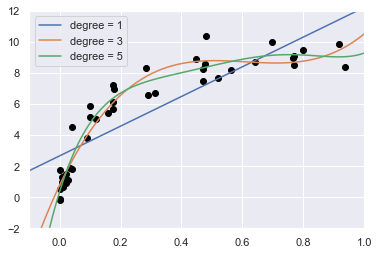

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()   # 设置图形样式
from sklearn.pipeline import Pipeline

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color = 'black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label = 'degree = {0}'.format(degree))

plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc = 'best');

$$\text{图5-27：用三种多项式回归模型拟合一份数据}$$   

这个例子中控制模型复杂度的关键是多项式的次数，它只要是非负整数就可以。那么问题来了：究竟多项式的次数是多少，才能在偏差(欠拟合)与方差(过拟合)间达到平衡？   
我们可以通过可视化验证曲线来回答这个问题——利用Scikit-Learn的validation_curve函数就可以非常简单地实现。只要提供模型、数据、参数和验证范围信息，函数就会自动计算验证范围内的训练得分和验证得分(如图5-28所示)：

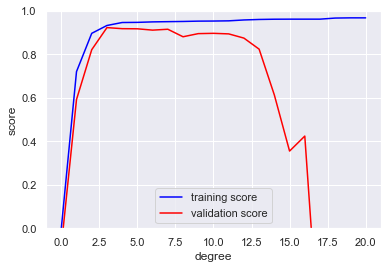

In [4]:
# from sklearn.learning_curve import validation_curve
# DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into 
#which all the functions are moved. This module will be removed in 0.20

import numpy as np
# from sklearn.model_selection import validation_curve

from sklearn.model_selection import learning_curve, GridSearchCV, validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,       # validation_curve函数用法已更新，参见
                                                                              # https://www.cnblogs.com/Vancuicide/p/9675472.html
                                          'polynomialfeatures__degree', degree, cv = 7)

plt.plot(degree, np.median(train_score, 1), color = 'blue', label = 'training score')
plt.plot(degree, np.median(val_score, 1), color = 'red', label = 'validation score')
plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

$$\text{图5-28：图5-27的验证曲线(参考图5-26)}$$

这幅图可以准确显示我们想要的信息：训练得分总是比验证得分高；训练得分随着模型复杂度的提升而单调递增；验证得分增长到最高点后由于过拟合而开始骤降。   
从验证曲线中可以看出，偏差与方差均衡性最好的是三次多项式。我们可以计算结果，并将模型画在原始数据上。

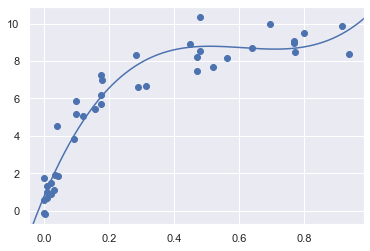

In [5]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

$$\text{图5-29：图5-27数据的交叉检验最优模型}$$

虽然寻找最优模型并不需要我们计算训练得分，但是检查训练得分与验证得分之间的关系可以让我们对模型的性能有更加直观的认识。

### 5.3.3 学习曲线   

影响模型复杂度的另一个重要因素是最优模型往往受到训练数据量的影响。例如，生成前面5倍的数据(200个点)(如图5-30所示)：

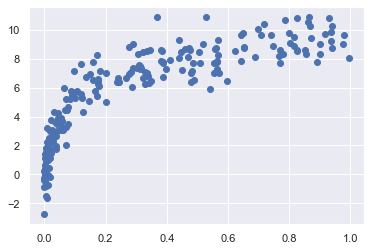

In [6]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

$$\text{图5-30：用学习曲线演示数据}$$   

运用前面的方法画出这个大数据集验证曲线。为了对比，把之前的曲线也画出来(如图5-31所示)：

Text(0, 0.5, 'score')

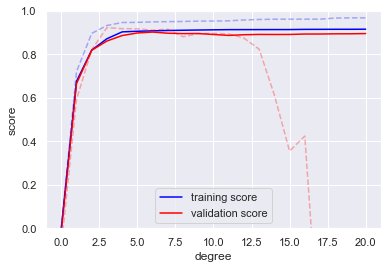

In [7]:
# from sklearn.learning_curve import validation_curve  # validation_curve函数已移入model_selection
from sklearn.model_selection import validation_curve

degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                           'polynomialfeatures__degree',
                                           degree, cv = 7)

plt.plot(degree, np.median(train_score2, 1), color = 'blue', 
         label = 'training score')
plt.plot(degree, np.median(val_score2, 1), color = 'red', 
         label = 'validation score')

plt.plot(degree, np.median(train_score, 1), color = 'blue', 
         alpha = 0.3, linestyle = 'dashed')
plt.plot(degree, np.median(val_score, 1), color = 'red', 
         alpha = 0.3, linestyle = 'dashed')

plt.legend(loc = 'lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

$$\text{图5-31：多项式模型拟合图5-30数据的学习曲线}$$

实线是大数据集的验证曲线，而虚线是前面小数据集的验证曲线。从验证曲线可以明显看出，大数据集支持更复杂的模型：虽然得分顶点大概是六次多项式，但是即使到了20次多项式，过拟合情况也不太严重——验证得分与训练得分依然十分接近。   
通过观察验证曲线的变化趋势，可以发现两个影响模型效果的因素：模型复杂度和训练数据集的规模。通常，我们将模型看成是与训练数据规模相关的函数，通过不断扩大数据集的规模来拟合模型，以此来观察模型的行为。反映训练集规模的训练得分/验证得分曲线被称为学习曲线(learning curve)。   
学习曲线的特征包括以下三点：   

* 特定复杂度的模型对较小的数据集容易过拟合：此时训练得分较高，验证得分较低。
* 特定复杂度的模型对较大的数据集容易欠拟合：随着数据的增大，训练得分会不断降低，而验证得分会不断升高。
* 模型的验证得分永远不会高于训练集得分：两条曲线一直在靠近，但永远不会交叉。   

有了这三条特征，就可以画出如图5-32所示的学习曲线。

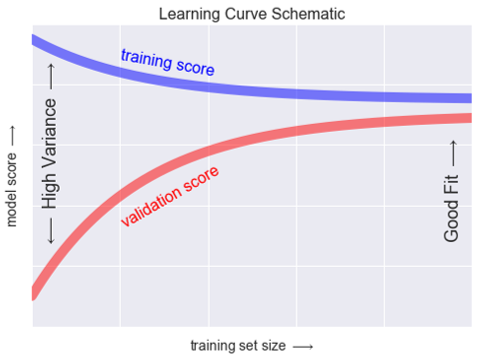

In [8]:
from IPython.display import Image
Image('D:\\graphs\\Python Data Science Handbook\\Chapter5\\graph5-32.png')

$$\text{图5-32：学习曲线原理图}$$   

学习曲线最重要的特征是，随着训练样本数量的增加，分数收敛到定值。因此，一旦你的数据多到使得模型得分已经收敛，那么增加更多的旋律样本也无济于事。改善模型性能的唯一方法就是换模型(通常也是换成更复杂的模型)。   

**Scikit-Learn学习曲线**   

Scikit-Learn计算模型学习曲线的函数非常简单。下面来计算前面数据集的二次多项式模型和九次多项式模型的学习曲线(如图5-33所示)：

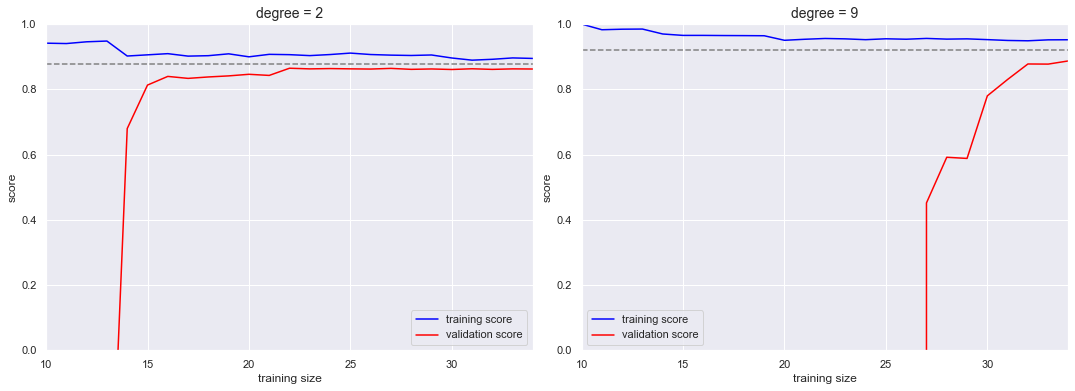

In [9]:
# from sklearn.learning_curve import learning_curve
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                        X, y, cv = 7,
                                        train_sizes = np.linspace(0.3, 1, 25))
    
    ax[i].plot(N, np.mean(train_lc, 1), color = 'blue', label = 'training score')
    ax[i].plot(N, np.mean(val_lc, 1), color = 'red', label = 'validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color = 'gray',
               linestyle = 'dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size = 14)
    ax[i].legend(loc = 'best')

$$\text{图5-33：低复杂度(左)和高复杂度(右)学习曲线}$$   

这幅图非常有参考价值，因为它可以展示毛线哦得分随着训练数据规模的变化而变化。尤其当你的学习曲线已经收敛时(即训练曲线和验证曲线已经贴在一起)，再增加训练数据也不能再显著改善拟合效果。这种情况就类似于左图显示的二次多项式模型的学习曲线。   
提高收敛得分的唯一方法就是换模型(通常也是更复杂的模型)。如右图所示：采用复杂度更高的模型之后，虽然学习曲线的收敛得分提高了(对比虚线所在位置)，但是模型的方差也变大了(对比训练得分与验证得分的差异即可看出)。如果我们为复杂度更高的模型继续增加训练数据，那么学习曲线最终也会收敛。   
为模型和数据画出学习曲线，可以帮你找到正确的方向，不断改进学习的效果。   

### 5.3.4 验证实践：网格搜索    

前面的内容已经让我们对偏差与方差的均衡有了直观的认识，它们与模型的复杂度和训练集的大小有关。在实际工作中，模型通常会有多个得分转折点，因此验证曲线和学习曲线的图形会从二维曲线变成多维曲线。这种高维可视化很难展现。因此从图中找出验证得分的最大值也不是一件简单的事。   
Scikit-Learn在grid_search提供了一个自动化工具解决这个问题。下面是用网格搜索寻找最有多项式回归模型的示例。我们将在模型特征的三维网格中寻找最优值——包括多项式的次数的搜索范围、回归模型是否拟合截距，以及回归模型是否需要进行标准化处理。我们可以用Scikit-Learn的GridSearchCV元评估器来设置这些参数：

In [10]:
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'ploynomialfeatures__degree': np.arange(21),
             'linearregression__fit_intercept':[True, False],
             'linearregression__normalize':[True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv = 7)

请注意，和普通的评估器一样，这个元评估器此时还没有应用到任何数据上。调用fit()方法在每个网格点上拟合模型，并同时记录每个点的得分：

In [14]:
grid.fit(X, y)

# Check the list of available parameters with `estimator.get_params().keys()`.
# sorted(pipeline.get_params().keys())

ValueError: Invalid parameter ploynomialfeatures for estimator Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.

模型拟合完成了，这样就可以获取最优参数了：

In [12]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

最后，还可以用最优参数的模型拟合数据，并画图显示(如图5-34所示)：

In [13]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X.test.ravel(), y_test, hold = True);
plt.axis(lim);

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

$$\text{图5-34：自动化网格搜索的最优拟合模型}$$

网格搜索提供了许多参数选项，包括自定义得分函数、并行计算，以及随机化搜索等能力。关于更多内容，请参考5.13节和5.14节，或者参考Scikit-Learn的网格搜索文档(<http://scikit-learn.org/stable/modules/grid_search.html>)。   

### 5.3.5 小结   

本节首先探索了模型验证与超参数优化的概念，重点介绍了偏差与方差均衡的概念，以及如何将这个概念应用到模型拟合过程中。尤其值得注意的是，我们发现通过验证集或交叉验证方法调整参数至关重要，这样做可以避免较复杂/灵活模型引起的过拟合问题。   
接下来将介绍一些常用模型的具体细节、可用的优化方法，以及自由参数(free parameter)对模型复杂度的影响。在学习新的机器学习方法时，请时刻牢记本节的内容！

## 5.4 特征工程      

上一节虽然介绍了机器学习的基本理念，但是所有势力都假设已经拥有了一个干净的[n_samples, n_features]特征矩阵。其实在现实工作中，数据很少会这么干净。因此，机器学习实践中更重要的步骤之一是特征工程(feature engineering)——找到与问题有关的任何信息，把它们转换成特征矩阵的数值。   
本节将介绍特征功能的一些常见的示例：表示分类数据的特征、表示文本的特征和表示图像的特征。另外，还会介绍提高模型复杂度的衍生特征和处理确实数据的填充方法。这个过程通常被称为向量化，因为它把任意格式的数据转换成具有良好特性的向量形式。   

### 5.4.1 分类特征   

一种常见的非数值数据类型是分类数据。例如，浏览房屋数据的时候，除了看到"房价"(price)和"面积"(rooms)之类的数值特征，还会有"地点"(neighborhood)信息，数据可能像这样：

In [1]:
data = [
    {'price':850000, 'rooms':4, 'neighborhood':'Queen Anne'},
    {'price':700000, 'rooms':3, 'neighborhood':'Fremont'},
    {'price':650000, 'rooms':3, 'neighborhood':'Wallingford'},
    {'price':600000, 'rooms':2, 'neighborhood':'Fremont'}
]

你可能会把分类特征用映射关系编码成整数：

In [3]:
{'Queen Anne':1, 'Fremont':2, 'Wallingford':3};

但是，在Scikit-learn中这样做并不是一个好办法：这个程序包的所有模块都有一个基本假设，那就是数值特征可以反映代数量(algebraic quantities)。因此，这样映射编码可能会让人觉得存在Queen Anne < Fremont < Walllingford，甚至还有Wallingford-Queen Anne = Fremont，这显然是没有意义的。   
面对这种情况，常用的解决方法是独热编码。它可以有效增加额外的列，让0和1出现在对应的列分别表示每个分类值有或无。当你的数据是像上面那样的字典列表时，用Scikit-Learn的DictVectorizer类就可以实现：

In [4]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse = False, dtype = int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

你会发现，neighborhood字段转换成三列来表示三个地点标签，每一行中用1所在的列对应一个地点。当这些分类特征编码之后，你就可以和之前一样拟合Scikit-Learn模型了：如果要看每一列的含义，可以用下面的代码查看特征名称：

In [5]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

但这种方法有一个显著的缺陷：如果你的分类特征有许多枚举值，那么数据集的维度就会急剧增加。然而，由于被编码的数据中有许多0，因此用稀疏矩阵表示会非常高效：

In [8]:
vec = DictVectorizer(sparse = True, dtype = int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

在拟合和评估模型时，Scikit-Learn的许多(并非所有)评估器都支持稀疏矩阵输入sklearn.preprocessing.OneHotEncoder和sklearn.feature_extraction.FeatureHasher是Scikit-Learn另外两个为分类特征编码的工具。   

### 5.4.2 文本特征     

另外一个常见的特征功臣需求是将文本转换成一组数值。例如，绝大多数社交媒体数据的自动化采集，都是依靠将文本编码成数字的技术手段。数据采集最简单的编码方法之一就是单词统计：给你几个文本，让你攻击每个词出现的次数，然后放在表格中。   
例如下面三个短语：

In [9]:
sample = ['problem of evil',
         'evil queen',
         'horizon problem']

面对单词统计的数据向量化问题，可以创建一个列来表示单词"problem"、单词"evil"和单词"horizon"等。虽然手动做也可以，但是用Scikit-Learn的CountVectorizer更是可以轻松实现：

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

结果是一个稀疏矩阵，里面记录了每个短语中每个单词的出现次数。如果用带列标签的DataFrame来表示这个稀疏矩阵就更方便了：

In [11]:
import pandas as pd
pd.DataFrame(X.toarray(), columns = vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


不过这种统计方法也有一些问题：原始的单词统计会让一些常用词聚集太高的权重，在分类算法中这样并不合理。解决这个问题的方法就是通过TF-IDF(term frequency-inverse documtnt frequency，词频逆文档频率)，通过单词在文旦中出现的频率来权衡其权重(**注：** IDF的大小与一个词的常见程度成反比)。计算这些特征的语法和之前的示例类似：

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns = vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


关于TF-IDF分类问题的示例，请参见5.3节。

### 5.4.3 图像特征    

机器学习还有一种常见需求，那就是对图像进行编码。我们在5.2节处理手写数字图像时使用的方法，是最简单的图像编码方法：用像素表示图像。但是在其他类型的任务中国，这类方法可能不太合适。   
虽然完整地介绍图像特征的提取技术超出了本章的方位，但是你可以在Scikit-Image项目(<http://scikit-image.org>)中找到许多标准方法的高品质实现。关于同时使用Scikit-Learn和Scikit-Image的示例，请参见5.14节。   

### 5.4.4 衍生特征    

还有一种有用的特征是输入特征经过数学变换衍生出来的新特征。我们在5.3节从数据数据中构造多项式特征时，曾经见过这类特征。我们发现将一个线性回归转换成多项式回归时，并不是通过改写模型来实现，而是通过改变数据数据！这种处理方式有时被称为基函数回归(basis function regression)，详见5.6节。   
例如，下面的数据显然不能用一条直线描述(如图5-35所示)：

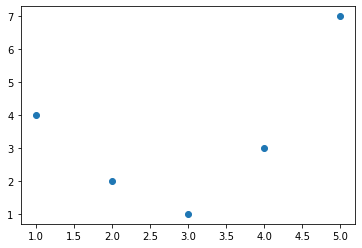

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y)

$$\text{图5-35：不能用直线拟合的数据}$$   

但是我们仍然用LinearRegression拟合出一条直线，并获得直线的最优解(如图5-36所示)：

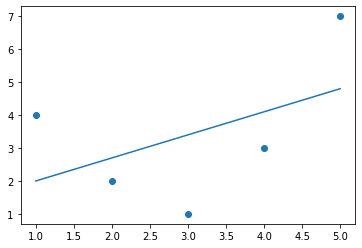

In [15]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

$$\text{图5-36：效果不好的拟合直线}$$   

很显然，我们需要用要给更复杂的模型来描述$x$与$y$之间的关系。可以对数据进行变换，并增加额外的特征来提升模型的复杂度。例如，可以在数据中增加多项式特征：

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, include_bias = False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


在衍生特征矩阵中，第1列表示$x$，第2列表示$x^2$，第3列表示$x^3$。通过这个扩展的输入矩阵计算线性回归，就可以获得更接近原始数据的结果了(如图5-37所示)：

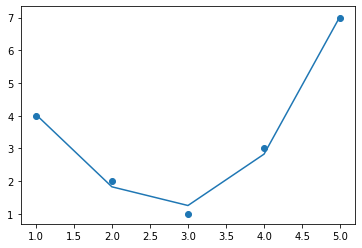

In [19]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

$$\text{图5-37：对数据衍生的多项式特征线性拟合的结果}$$   

这种不通过改变模型，而是通过变换输入来改善模型效果的理念，正是许多更强大的机器学习方法的基础。5.6节介绍基函数回归将详细介绍这个理念，它通常被认为是强大的核方法(kernel method，5.7节将详细介绍)技术的驱动力之一。

### 5.4.5 缺失值填充     

特征工程中还有一种常见需求是处理缺失值。我们在3.5节中介绍过DataFrame的缺失值处理方法，也看到了NaN通常用来表示缺失值。例如，有如下一个数据集：

In [20]:
from numpy import nan
X = np.array([[nan, 0,   3],
             [3,    7,   9],
             [3,    5,   2],
             [4,    nan, 6],
             [8,    8,   1]])
y = np.array([14, 16, -1, 8, -5])

当将一个普通的机器学习模型应用到这份数据时，首先需要用适当的值替换这些缺失数据。这个操作被称为缺失值填充，相应的策略很多，有的简单(例如用列均值替换缺失值)，有的复杂(例如用矩阵填充或其他模型来处理缺失值)。   
复杂方法在不同的应用中各不相同，这里不再深入介绍。对于一般的填充方法，如均值、中位数、众数，Scikit-Learn有Imputer类可以实现：

In [23]:
# from sklearn.preprocessing import Imputer
# The class(Imputer) is deprecated, use:
from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imp = SimpleImputer(strategy = 'mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

我们会发现，结果矩阵中的两处缺失值都被所在列剩余数据的均值替代了。这个被填充的数据就可以直接放到评估器里训练了，例如LinearRegression评估器：

In [24]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

### 5.4.6 特征管道    

如果经常需要手动应用前文介绍的任意一种方法，你很快就会感到厌倦，尤其是当你需要将多个步骤串起来使用时。例如，我们可能需要对一些数据做如下操作。   

(1) 用均值填充缺失值。   
(2) 将衍生特征转换为二次方。   
(3) 拟合线性回归模型。   

为了实现这种管道处理过程，Scikit-Learn提供了一个管道对象，如下所示：

In [25]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(SimpleImputer(strategy = 'mean'),
                     PolynomialFeatures(degree = 2),
                     LinearRegression())

这个管道看起来就像一个标准的Scikit-Learn对象，可以对任何输入数据机芯所有步骤的处理：

In [26]:
model.fit(X, y)     # 和上面一样，X带有缺失值
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


这样的话，所有的步骤都会自动完成。请注意，出于简化演示考虑，将模型应用到已经训练过的数据上，模型能够非常完美地预测结果(详情参见5.7节)。   
关于Scikit-Learn管道实战的更多示例，请参考下面的朴素贝叶斯分类和5.6节，5.7节的内容。

## 5.5 专题：朴素贝叶斯分类   

前面四节简单介绍了机器学习的基本概念。从本节开始，将详细介绍一些经典的有监督和无监督学习算法，先从朴素贝叶斯分类开始。    
朴素贝叶斯模型是一组非常简单快速的分类算法，通常适用于维度非常高的数据集。因为运行速度快，而且可调参数少，因此非常适合为分类问题提供快速粗糙的基本方案。本节重点介绍朴素贝叶斯分类器(naive Bayes Classifiers)的工作原理，并通过一些示例演示朴素贝叶斯分类器在经典数据集上的应用。   
朴素贝叶斯(Naive Bayes)法(**注：** 朴素贝叶斯法与贝叶斯估计(Bayesian estiomation)是不同的概念。)是基于贝叶斯定理与特征条件独立假设的分类方法。对于给定的训练数据集，首先基于特征条件独立假设学习输入输出的联合概率分布；然后基于此模型，对给定的输入$x$，利用贝叶斯定理求出后验概率最大的输出$y$。朴素贝叶斯实现简单，学习与预测的效率很高，是一种常用的方法。   
本章叙述朴素贝叶斯法，包括朴素贝叶斯法的学习与分类、朴素贝叶斯法的参数估计算法。  

## 5.5_0 朴素贝叶斯法的学习与分类    

### 5.5_0.1 基本方法    

设输入空间$\mathcal{X}\subseteq\mathbf{R}^n$为$n$维向量的集合，输出空间为类标记集合$\mathcal{Y}=\{c_1,\,c_2,\,\cdots,\,x_{_K}\}$。输入为特征向量$x\in\mathcal{X}$，输出为类标记(class label)$y\in\mathcal{Y}$。$X$是定义在输入空间$\mathcal{X}$上的随机向量，$Y$是定义在输出空间$\mathcal{Y}$上的随机变量。$P(X,Y)$是$X$和$Y$的联合概率分布。训练数据集：   
$$T = \{(x_1,\,y_1),\,(x_2,\,y_2),\,\cdots,\,(x_{_N},y_{_N})\}$$
由$P(X,Y)$独立同分布产生。    
朴素贝叶斯法通过训练数据集学习联合概率分布$P(X,Y)$。具体地说，学习一下先验概率分布及条件概率分布。先验概率分布：   
$$P(Y = c_k),\quad k = 1,\,2,\,\cdots,\,K \label{4.1}$$
条件概率分布    
$$P(X = x|Y = c_k) = P\left(X^{(1)} = x^{(1)},\,\cdots,\,X^{(n)} = x^{(n)}|Y = c_k\right),\quad k = 1,\,2,\,\cdots,\,K \label{4.2}$$
于是学习到联合概率分布$P(X,\,Y)$。   
条件概率分布$P(X = x|Y = c_k)$有指数级数量的参数，其估计实际是不可行的。事实上， 假设$x^{(j)}$可取值有$S_j$个，$j = 1,\,2,\,\cdots,\,n$，$Y$可取值有$K$个，那么参 数个数为$K\prod_{j=1}^n{S_j}$。   
朴素贝叶斯法对条件概率分布做了条件独立的假设。由于这是一个较强的假设，朴素贝叶斯法也由此得名。具体地，条件独立性假设是：
$$
\begin{align}
P(X = x|Y = c_k) & = P\left(X^{(1)} = x^{(1)},\,\cdots,\,X^{(n)} = x^{(n)}|Y = c_k\right) \\
                 & = \prod_{j=1}^n{P\left(X^{(j)} = x^{(j)}|Y = c_k\right)} \label{4.3}
\end{align}
$$   
朴素贝叶斯法实际上学习到生成数据的机制，所以属于生成模型。条件独立假设等于是说用于分类的特征在类确定的条件下都是条件独立的。这一假设使朴素贝叶斯法变得简单，但有时会牺牲一定的分类准确率。   
朴素贝叶斯法分类时，对给定的输入$x$，通过学习到的模型计算后验概率分布$P(Y = c_k|X = x)$，将后验概率最大的类作为$x$的类输出。后验概率根据贝叶斯定理进行：   
$$P(Y = c_k|X = x) = \frac{P(X = x|Y = c_k)P(Y = c_k)}{\sum_k{P(X = x|Y = c_k)P(Y = c_k)}} \label{4.4}$$
将式(4.3)代入式(4.4)，有：   
$$P(Y = c_k|X = x) = \frac{P(Y = c_k)\prod_j{P\left(X^{(j)}=x{(j)}|Y = c_k\right) }}{\sum_k{P(Y = c_k)}\prod_j{P\left(X^{(j)}=x{(j)}|Y = c_k\right)}},\quad k = 1,\,2,\,\cdots,\,K \label{4.5}$$   
这是朴素贝叶斯法分类的基本公式。于是，朴素贝叶斯分类器可表示为：   
$$y = f(x) = \mathrm{arg}\max_{c_k}{\frac{P(Y = c_k)\prod_j{P\left(X^{(j)}=x{(j)} |Y = c_k\right) }}{\sum_k{P(Y = c_k)}\prod_j{P\left(X^{(j)}=x{(j)}|Y = c_k\right) }}} \label{4.6}$$
注意到，在式(4.6)中分母对所有$c_k$都是相同的，所以,   
$$y = f(x) = \mathrm{arg}\max_{c_k}{P(Y = c_k)\prod_j{P\left(X^{(j)}=x^{(j)}|Y = c_k\right)}} \label{4.7}$$

### 5.5_0.2 后验概率最大化的含义    

朴素贝叶斯将实例分到后验概率最大的类中。这等价于期望风险最小化。假设选择0-1损失函数：   
$$
L(Y,\,f(X)) = 
\begin{cases}
1,\quad Y\neq f(X) \\
0,\quad Y = f(X)
\end{cases}
$$
式中，$f(X)$是分类决策函数。这时，期望风险函数为：   
$$R_{exp}(f) = E[L(Y,\,f(X))]$$
期望是对联合分布$P(X,\,Y)$取的。由此取条件期望：   
$$R_{exp}(f) = E_X\left[\sum_{k=1}^K[L(c_k,f(X))]P(c_k|X)\right]$$   
为了使期望风险最小化，只需对$X = x$逐个极小化，由此得到：   
$$
\begin{align}
f(x) & = \mathrm{arg}\min_{y\in\mathcal{Y}}{\sum_{k=1}^K{L(c_k,y)P[c_k|X=x]}} \\
     & = \mathrm{arg}\min_{y\in\mathcal{Y}}{\sum_{k=1}^K{P[y\neq c_k|X=x]}} \\
     & = \mathrm{arg}\min_{y\in\mathcal{Y}}{[1-P(y=c_k|X=x)]} \\
     & = \mathrm{arg}\max_{y\in\mathcal{Y}}{P(y=c_k|X=x)} 
\end{align}
$$
这样一来，根据期望风险最小化准则就得到了后验概率最大化准则：   
$$f(x) = \mathrm{arg}\max_{c_k}{P(c_k|X=x)}$$   
即朴素贝叶斯所采用的原理。

### 5.5_0.3 朴素贝叶斯法的参数估计    

1. 极大似然估计   

在朴素贝叶斯法中，学习意味着估计$P(Y = c_k)$和$P\left(X^{(j)}=x^{(j)}|Y = c_k \right)$。可以应用极大似然估计法估计相应的概率。先验概率$P(Y = c_k)$的极大似然估 计是：   
$$P(Y = c_k) = \frac{\sum_{i=1}^N{I(y_i=c_k)}}{N},\quad k = 1,\,2,\,\cdots,\,K \label{4.8}$$
设第$j$个特征$x^{(j)}$可能取值的集合为$\{a_{j1},\,a_{j2},\,\cdots,\,a_{j_{S_j}}\}$，条件概率$P\left(X^{(j)}=a_{jl}|Y=c_k\right)$的极大似然估计是：
$$P\left(X^{(j)}=a_{jl}|Y=c_k\right)=\frac{\sum_{i=1}^N{I\left(x_i^{(jl)}=a_{jl},\,y_i=c_k\right)}}{\sum_{i=1}^N{I(y_k=c_k)}},\quad j=1,\,2,\,\cdots,\,K \label{4.9}$$
式中，$x_i^{(j)}$是第$i$个样本的第$j$个特征；$a_{jl}$是第$j$个特征可能取的第$l$个值；$I$为指示函数。   

2. 学习与分类算法   

下面给出朴素贝叶斯法的学习与分类算法。   
**算法4.1(朴素贝叶斯算法(naive Bayes algorithm))**   
输入：训练数据$T=\{(x_1,\,y_1),\,(x_2,\,y_2),\,\cdots,\,(x_{_N},\,y_{_N}\}$，其中$x_i=\left(x_i^{(1)},\,x_i^{(2)},\,\cdots,\,x_i^{(n)}\right)^T$，$x_i^{(j)}$是第$i$个样本的第$j$个特征，$x_i^{(j)}\in\{a_{j1},\,a_{j2},\,\cdots,\,a_{j_{S_j}}\}$，$a_{jl}$是第$j$个特征可能取的第$l$个值，$j=1,\,2,\,\cdots,\,n,\quad l=1,\,2, \,\cdots,\,S_j,\,y_i\in\{c_1,\,c_2,\,\cdots,\,c_{_K}\}$；实例$x$；   
输出：实例$x$的分类。   

(1) 计算先验概率及条件概率： 
$$
\begin{align}
P(Y = c_k) & = \frac{\sum_{i=1}^N{I(y_i = c_k)}}{N}\quad k = 1,\,2,\,\cdots,\,K \\
P(X^{(j)} = a_{jl}|Y = c_k) & =\frac{\sum_{i=1}^N{I\left(x_i^{(j)}=a_{jl},y_i = c_k\right)}}{\sum_{i = 1}^N{I(y_i = c_k)}} \\
j & = 1,\,2,\,\cdots,\,n;\,l = 1,\,2,\,\cdots,\,S_j\,;k = 1,\,2,\,\cdots,\,K
\end{align}  \label{4.9}
$$
(2) 对于给定的实例$x=\left(x^{(1)},\,x^{(2)},\,\cdots,\,x^{(n)}\right)^T$，计算：   
$$P(Y = c_k)\prod_{j=1}^n{P\left[X^{(j)}=x^{(j)}|Y=c_k\right]},\quad k=1,\,2,\, \cdots,\,K$$
(3) 确定实例$x$的类：   
$$y=\mathrm{arg}\max_{c_k}{P(Y=c_k)\prod_{j=1}^n{P\left[X^{(j)}=x^{(j)}|Y=c_k\right]}}$$   

**例5.1**$\quad$ 试由表4.1的训练数据学习一个朴素贝叶斯分类器并确定$x=(2,S)^T$的类标记$y$。表中$X^{(1)},X^{(2)}$为特征，取值的集合分别为$A_1=\{1,\,2,\,3\},\,A_2=\{S,\,M,\,L\},\,Y$为类标记，$Y\in C = \{1,\,-1\}$。   

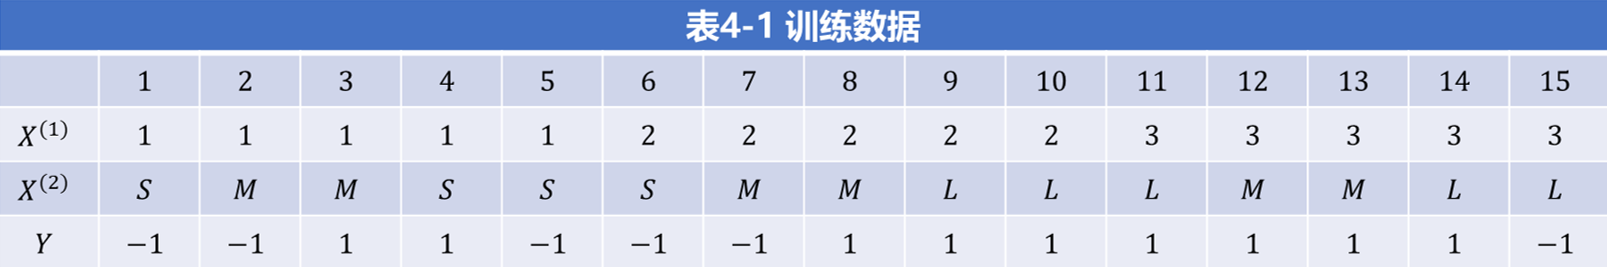

In [1]:
from IPython.display import Image
Image('D:\\graphs\\Python Data Science Handbook\\Chapter5\\table5-1.png')

**解**$\quad$ 根据算法4.1，由表4.1，容易计算下列概率：
$$
\begin{align}
& P(Y = 1) = \frac{9}{15},\, P(Y=-1)=\frac{6}{15} \\
& P\left(X^{(1)}=1|Y=1\right)=\frac{2}{9},\,P\left(X^{(1)}=2|Y=1\right)=\frac{3}{9},\,P\left(X^{(1)}=3|Y=1\right)=\frac{4}{9} \\
& P\left(X^{(2)}=S|Y=1\right)=\frac{1}{9},\,P\left(X^{(2)}=M|Y=1\right)=\frac{4}{9},\,P\left(X^{(2)}=L|Y=1\right)=\frac{4}{9} \\
& P\left(X^{(1)}=1|Y=-1\right)=\frac{3}{6},\,P\left(X^{(1)}=2|Y=-1\right)=\frac{2}{6},\,P\left(X^{(1)}=3|Y=-1\right)=\frac{1}{6} \\
& P\left(X^{(2)}=S|Y=-1\right)=\frac{3}{6},\,P\left(X^{(2)}=M|Y=-1\right)=\frac{2}{6},\,P\left(X^{(2)}=L|Y=-1\right)=\frac{1}{6} \\
\end{align}
$$
对于给定的$x=(2,S)^T$计算：   
$$
\begin{align}
& P(Y=1)P\left(X^{(1)}=2|Y=1\right)P\left(X^{(2)}=S|Y=1\right)=\frac{9}{15}\cdot\frac{3}{9}\cdot\frac{1}{9}=\frac{1}{45}  \\
& P(Y=-1)P\left(X^{(1)}=2|Y=-1\right)P\left(X^{(2)}=S|Y=-1\right)=\frac{6}{15}\cdot\frac{2}{6}\cdot\frac{3}{6}=\frac{1}{15} 
\end{align}
$$
因为$P(Y=-1)P\left(X^{(1)}=2|Y=-1\right)P\left(X^{(2)}=S|Y=-1\right)$最大，所以$y=-1$。   

3. 贝叶斯估计    

用极大似然估计可能会出现所要估计的概率值为0的情况，这会影响到后验概率的计算结果，使分类产生偏差。解决之一问题的方法是采用贝叶斯估计。具体地，条件概率的贝叶斯估计是：   
$$P_{\lambda}\left(X^{(j)}=a_{jl}|c_k\right)=\frac{\sum_{i=1}^N{I\left(x_i^{(j)}=a_{jl},\,y_i=c_k\right)+\lambda}}{\sum_{i=1}^N{I(y_i=c_k)+S_j\lambda}} \label{4.10}$$   
式中$\lambda\geq0$。等价于在随机变量各个取值的频数上赋予一个正数$\lambda>0$。当$\lambda>0$时就是极大似然估计。常取$\lambda=1$，这是称为拉普拉斯平滑(Laplacian sm oothing)。显然对任何$l=1,\,2,\,\cdots,\,S_j,\quad k=1,\,2,\,\cdots,\,K$，有：
$$
\begin{align}
& P_{\lambda}\left(X^{(j)}=a_{jl}|Y=c_k\right)>0  \\
& \sum_{l=1}^{S_j}{P\left(X^{(j)}=a_{jl}|Y=c_k\right)=1}
\end{align}
$$
表明是(4-10)确为一种概率分布。同样，先验概率的贝叶斯估计是：   
$$P_{\lambda}(Y=c_k)=\frac{\sum_{i=1}^N{I(y_i=c_k)+\lambda}}{N+K\lambda} \label{4.11}$$
**例4.2**$\quad$ 问题同例4.1，按照拉普拉斯平滑估计概率，即取$\lambda=1$。   
**解**$\quad A_1=\{1,\,2,\,3\},\,A_2=\{S,\,M,\,L\},\,C=\{1,\,-1\}$。按照式(4.10)和式(4.11)计算下列概率：   
$$
\begin{align}
& P(Y=1)=\frac{10}{17},\quad P(Y=-1)=\frac{7}{17} \\
& P\left(X^{(1)}=1|Y=1\right)=\frac{3}{12},\quad P\left(X^{(1)}=2|Y=1\right) =\frac{4}{12},\quad P\left(X^{(1)}=3|Y=1\right)=\frac{5}{12} \\
& P\left(X^{(2)}=S|Y=1\right)=\frac{2}{12},\quad P\left(X^{(2)}=M|Y=1\right) =\frac{5}{12},\quad P\left(X^{(1)}=L|Y=1\right)=\frac{5}{12} \\
& P\left(X^{(1)}=1|Y=-1\right)=\frac{4}{9},\quad P\left(X^{(1)}=2|Y=-1\right) =\frac{3}{9},\quad P\left(X^{(1)}=3|Y=-1\right)=\frac{2}{9} \\
& P\left(X^{(2)}=S|Y=-1\right)=\frac{4}{9},\quad P\left(X^{(2)}=M|Y=-1\right) =\frac{3}{9},\quad P\left(X^{(1)}=L|Y=-1\right)=\frac{2}{9} \\
\end{align}
$$
对于给定的$x=(2,\,S)^T$，计算：   
$$
\begin{align}
& P(Y=1)P\left(X^{(1)}=2|Y=1\right)P\left(X^{(2)}=S|Y=1\right)=\frac{10}{17}\cdot\frac{4}{12}\cdot\frac{2}{12}=\frac{5}{153}=0.0327  \\
& P(Y=-1)P\left(X^{(1)}=2|Y=-1\right)P\left(X^{(2)}=S|Y=-1\right)=\frac{7}{17}\cdot\frac{3}{9}\cdot\frac{4}{9}=\frac{28}{459}=0.0610 
\end{align}
$$
因为$P(Y=-1)P\left(X^{(1)}=2|Y=1\right)P\left(X^{(2)}=S|Y=-1\right)$最大，所以$y=-1$。   

### 5.5.1 贝叶斯分类    

朴素贝叶斯分类器建立在贝叶斯分类方法的基础上，其数学基础是贝叶斯定理(Bayes's theorem)——一个描述统计量条件概率关系的公式。在贝叶斯分类中，我们希望确定一个具有某些特征的样本数据属于某类标签的概率，通常记为$P(L|特征)$。贝叶斯定理告诉我们，可以直接用下面的公式计算这个概率：
$$P(L|\text{特征})=\frac{P(\text{特征}|L)P(L)}{P(\text{特征})}$$
假如需要确定两种标签，定义为$L_1$和$L_2$，一种方法就是计算这两个标签的后验概率的比值：
$$\frac{P(L_1|\text{特征})}{P(L_2|\text{特征})}=\frac{P(\text{特征}|L_1)P(L_1)}{P(\text{特征}|L_2)P(L_2)}$$
现在需要一种模型，帮我们计算每个标签的$P(\text{特征}|L_i)$。这种模型被称为生成模型，因为它可以训练出生成输入数据的假设随机过程(或称为概率分布)。为每种标签设置生成模型是贝叶斯分类器训练过程的主要部分。虽然这个训练步骤通常很难做，但是我们可以通过对模型进行随机分布的假设，来简化训练工作。   
之所以称为"朴素"或"朴素贝叶斯"，是因为如果对每种标签的的生成模型进行非常简单的假设，就能找到每种类型生成模型的近似解，然后就可以使用贝叶斯分类。不同类型的朴素贝叶斯分类器是由对数据的不同假设决定的，下面将介绍一些示例来进行演示。首先导入需要的程序库：

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### 5.5.2 高斯朴素贝叶斯    

最容易理解的朴素贝叶斯分类器可能就是高斯朴素贝叶斯(Gaussian naive Bayes)了，这个分类器假设每个标签的数据都服从简单的高斯分布。假设你有下面的数据(如图5-38所示)：

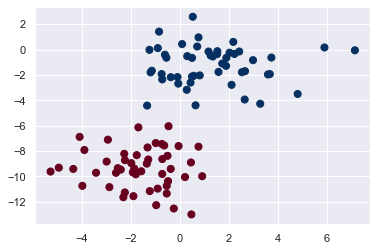

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers = 2, random_state = 2, cluster_std = 1.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'RdBu')

$$\text{图5-38：高斯朴素贝叶斯分类数据}$$   

一种快速创建简易模型的方法就是假设数据服从高斯分布，且变量无协方差(no covariance，指线性无关)。只要找出每个标签的所有样本点均值和标准差，在定义一个高斯分布，就可以拟合模型了。这个简单的高斯假设分类的结果如图5-39所示。

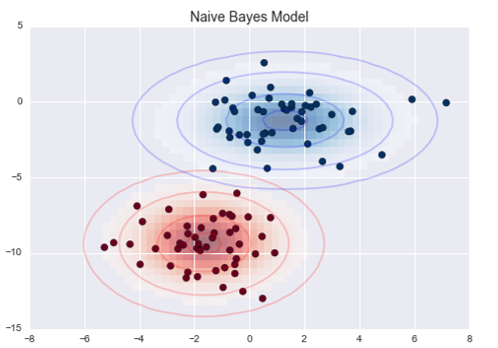

In [3]:
from IPython.display import Image
Image("D:\\graphs\\Python Data Science Handbook\\Chapter5\\graph5-39.png")

$$\text{图5-39：高斯朴素贝叶斯模型可视化图}$$   

图中的椭圆形曲线表示每个标签的高斯生成模型，越靠近椭圆中心的可能性越大。通过每种类型的生成模型，可以计算出任意数据点的似然估计(likelihood)$P(特征|L_1)$，然后根据贝叶斯定理计算出后验概率比值，从而确定每个数据点可能性最大的标签。   
该步骤在Scikit-Learn的sklearn.naive_bayes.GaussianNB评估器中实现：

In [6]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

现在来生成一些新数据来预测标签：

In [7]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

可以将这些数据画出来，看看决策边界的位置(如图5-40所示)：

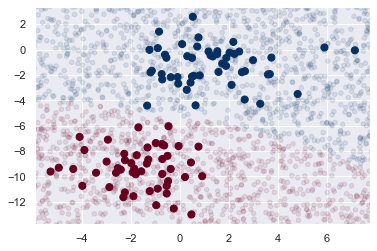

In [8]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c = ynew, s = 20, cmap = 'RdBu', alpha = 0.1)
plt.axis(lim);

$$\text{图5-40：高斯朴素贝叶斯分类可视化图}$$   

可以在分类结果中看到一条稍显弯曲的边界——通常，高斯朴素贝叶斯的边界是二次曲线。   
贝叶斯主义(Bayesian formalism)的一个优质特性时它天生支持概率分类，我们可以用predict_proba方法计算样本属于某个标签的概率：

In [10]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

这个数组分别给出了前两个标签的后验概率。如果你需要评估分类器的不确定性，那么这类贝叶斯方法非常有用。   
当然，由于分类的最终效果只能依赖于一开始的模型假设，因此高斯朴素贝叶斯经常得不到非常好的结果。但是，在许多场景中，尤其是特征比较多的时候，这种假设并不妨碍高斯朴素贝叶斯成为一种有用的方法。   

### 5.5.3 多项式朴素贝叶斯     

前面介绍的高斯假设并不意味着每个标签的生成模型只能用这一种假设。还有一种常用的假设是多项式朴素贝叶斯(multinomial naive Bayes)，它假设特征是由一个简单多项式分布生成的。多项分布可以描述各种类型样本出现次数的概率，因此多项式朴素贝叶斯非常适合用于描述出现次数或者出现次数比例的特征。   
这个理念和前面介绍的一样，只不过模型数据的分布不再是高斯分布，而是多项式分布代替而已。   

1. **案例：文本分类**   

多项式朴素贝叶斯通常用于文本分类。其特征都是指待分类文本的单词出现次数或者频次。5.4节介绍过文本特征提取的方法，这里用20个网络新闻组语料库(20 Newsgroups corpus，约20000篇新闻)的单词出现次数作为特征，演示如何用多项式朴素贝叶斯对这些新闻组进行分类。   
首先，下载数据并看看新闻组的名字：

In [1]:
from sklearn.datasets import fetch_20newsgroups

# data = fetch_20newsgroups()
# data.target_names

为了简化演示过程，只选择四类新闻，下载训练集合测试集：

In [2]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space',
             'comp.graphics']
train = fetch_20newsgroups(subset = 'train', categories = categories)
test = fetch_20newsgroups(subset = 'test', categories = categories)

选其中一篇新闻看看：

In [3]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



为了让这些数据能用于机器学习，需要每个字符串的内容转换成数值向量。可以创建一个管道，将TF-IDF向量化方法(详情请参见5.4节)与多项式朴素贝叶斯分类器组合在一起：

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

通过这个管道，就可以将模型应用到训练集上，预测出每个预测数据的标签：

In [5]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

这样就可以得到每个测试数据的预测标签，可以进一步评估评估器的性能了。例如，用混淆矩阵统计测试数据的真实标签与预测标签的结果(如图5-41所示)：

Text(89.133125, 0.5, 'predicted label')

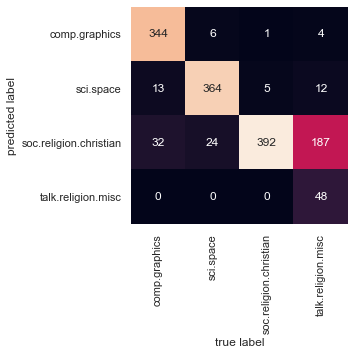

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels = train.target_names, yticklabels = train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

$$\text{图5-41：多项式朴素贝叶斯文本分类器混淆矩阵}$$   

从图中可以明显看出，虽然用如此简单的分类器可以很好地区分关于宇宙的新闻和关于计算机的新闻，但是宗教新闻和基督教新闻的区分效果却不太好。可能是这两个领域本身就容易令人混淆！   
但现在我们有一个可以对任何字符串进行分类的工具了，只要用管道的predict()反复就可以预测。下面的函数可以快速返回字符串的预测结果：

下面试试模型预测效果：

In [8]:
predict_category('sending a payload to the ISS')

'sci.space'

In [9]:
predict_category('discussion islam vs atheism')

'soc.religion.christian'

In [10]:
predict_category('determing the screen resolution')

'comp.graphics'

虽然这个分类器不会比直接用字符串内单词(加权的)频次构建的简易概率模型更复杂，但是它的分类效果却非常好。由此可见，即使是一个非常简单的算法，只要能合理利用并进行大量高维数据训练，就可以获得意想不到的效果。

### 5.5.4 朴素贝叶斯的应用场景     

由于朴素贝叶斯分类器对数据有严格的假设，因此它的训练效果通常比复杂模型的差。其优点主要体现在以下四个方面。   

* 训练和预测的速度非常快。
* 直接使用概率预测。
* 通常很容易解释。
* 可调参数(如果有的话)非常少。   

这些优点使得朴素贝叶斯分类器通常很适合作为分类的初始解。如果分类效果满足要钱，那么万事大吉，你获得了一个非常快速且容易解释的分类器。但如果分类效果不够好，那么你可以尝试更复杂的分类模型，与朴素贝叶斯分类器的分类效果进行对比，看看复杂模型的分类效果究竟如何。   
朴素贝叶斯分类器非常适合用于以下应用场景。   

* 假设分布函数与数据匹配(实际中很少见)。
* 各种类型的的区分度很高，模型复杂度不重要。
* 非常高维度的数据，模型复杂度不重要。   

后两条看似不同，其实彼此相关：随着数据集维度的增加，任何两点都不太可能逐渐靠近(毕竟它们得在每一个维度上都足够接近才行)。也就是说，在新维度会增加样本数据信息量的假设条件下，高维数据的簇中心点比低维数据的簇中心点更分散。因此，随着数据维度不断增加，想朴素贝叶斯这样的简单分类器的分类效果会和复杂分类器一样，甚至更好——只要你有足够的数据，简单的模型也可以非常强大。

## 5.6 专题：线性回归     

如果说朴素贝叶斯(详情请参见5.5节)是解决分类任务的好起点，那么线性回归模型就是解决回归任务的好起点。这些模型之所以大受欢迎，是因为它们的拟合速度非常快，而且很容易解释。你可能对线性回归模型最简单的形式(即对数据拟合一条直线)已经很熟悉了，不过经过扩展，这些模型可以对更复杂的数据行为进行建模。   
本节将先快速直观地介绍线性回归问题背后的数据基础知识，然后介绍如何对线性回个模型进行一般化处理，使其能够解决数据中更复杂的模型。首先导入常用的程序库：

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

### 5.6.1 简单线性回归    

首先来介绍广为人知的线性回归模型——将数据拟合成一条直线。直线拟合的模型方程为$y=ax+b$，其中$a$是直线斜率，$b$是直线截距。   
看看下面的数据，它们是从斜率为2，截距为-5的直线中抽取的散点(如图5-42所示)：

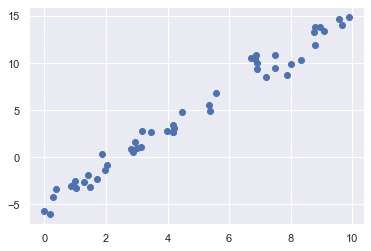

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

$$\text{图5-42：线性回归数据}$$   

可以用Scikit-Learn的LinearRegression评估器来拟合数据，并获得最佳拟合直线(如图5-43所示)：

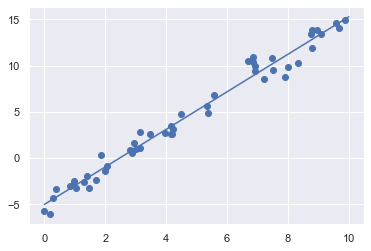

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

$$\text{图5-43：线性回归模型}$$   

数据的斜率和截距都在模型的拟合参数中，Scikit-Learn通常会在参数后面加一条下划线，即coef_和intercept_:

In [4]:
print('Model slope:    ', model.coef_[0])
print('Model intercetp:', model.intercept_)

Model slope:     2.027208810360695
Model intercetp: -4.998577085553202


可以看到，拟合结果与真实值非常接近，这正是我们想要的。   
然而，LinearRegression评估器能做到的可远不止这些——除了简单的直线拟合，它还可以处理多维度的线性回归模型：
$$y = a_0 + a_1x_1 + a_2x_2 + \cdots$$
里面有多个$x$变量。从几何学的角度看，这个模型是拟合三维空间中的一个平面，或者是为更高维度的数据拟合一个超平面。   
虽然这类回归模型的多维特性使得它们很难可视化，但是我们可以用NumPy的矩阵乘法运算符创建一些数据，从而演示这类拟合过程：

In [5]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000144
[ 1.5 -2.   1. ]


其中$y$变量是由3个随机的$x$变量线性组合而成，线性回归模型还原了方程的系数。   
通过这种方式，就可以用一个LinearRegression评估器拟合数据的回归直线、平面和超平面了。虽然这种方法还是有局限性，因为它将变量限制在了线性关系上，但是不用担心，还有其他方法。

### 5.6.2 基函数回归   

你可以通过基函数对原始数据进行变换，从而将变量的线性回归模型转换为非线性回归模型。我们前面已经介绍过这个技巧，在5.3节和5.4节的PolynomialRegression管道示例中都有提及。这个方法的多维模型是：   
$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + \cdots$$
其中一维的输入变量$x$转换成了三维变量$x_1$、$x_2$和$x_3$。让$x_n = f_n(x)$，这里的$f_n()$是转换数据的函数。   
假如f_n(x) = x^n，那么模型就会变成多项式回归：
$$y = a_0 + a_1x + a_2x^2 + a_3x^3 + \cdots$$
需要注意的是，这个模型仍然是一个线性模型，也就是说系数$a_n$彼此不会相乘或相除，我们其实是将一维的$x$投影到了高维空间，因此通过线性模型就可以拟合出$x$与$y$间更复杂的关系。   

1. 多项式基函数   

多项式投影非常有用，因此Scikit-Learn内置了PolynomialFeatures转换器实现这个功能：

In [6]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias = False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

转换器通过指数函数，将一维数组转换成了三维数组。这个新的高维数组之后可以放在多项式回归模型中。   
就像在5.4节介绍的那样，最简洁的方式是用管道实现这些过程。让我们创建一个7次多项式回归模型：

In [9]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                          LinearRegression())

数据经过转换之后，我们就可以用线性模型来拟合$x$和$y$之间复杂的关系了。例如，下面是一条带噪的正弦波(如图5-44所示)：

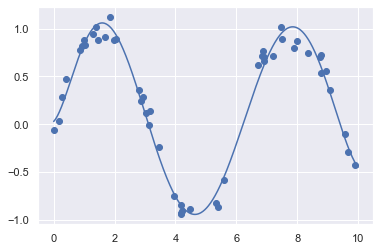

In [10]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

$$\text{图5-44：线性多项式回归模型拟合非线性训练数据}$$

通过运用7次多项式基函数，这个线性模型可以对非线性数据拟合出极好的效果！   

2. 高斯基函数   

当然还有其他类型的基函数。例如，有一种常用的拟合模型方法使用的并不是一组多形式基函数，而是一组高斯基函数。最终结果如图5-45所示。

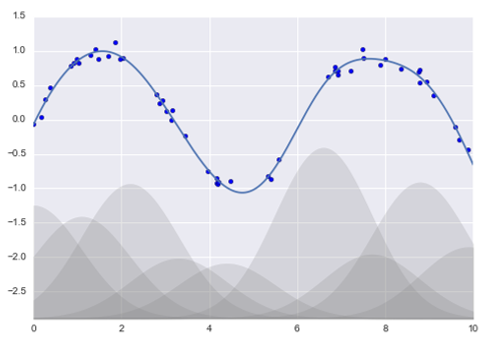

In [11]:
from IPython.display import Image
Image('D:\\graphs\\Python Data Science Handbook\\Chapter5\\graph5-45.png')

图5-45中的阴影部分代表不同规模基函数，把他们放在一起时就会产生平滑的曲线。Scikit-Learn并没有内置这些高斯基函数，但我们可以自己写一个转换器来创建高斯基函数，效果如图5-46所示(Scikit-Learn的转换器都是用Python类实现的，阅读Scikit-Learn的源代码可能更好地理解它们的创建方式)：

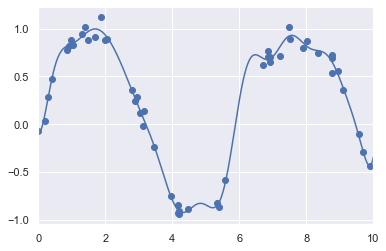

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    '''一维输入均匀分布的高斯特征'''
    
    def __init__(self, N, width_factor = 2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis = None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y = None):
        # 在数据区间中创建N个高斯分布中心
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                               self.width_, axis = 1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                           LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

$$\text{图5-46：通过自定义转换器，实现高斯基函数拟合}$$

我们之所以将这个示例放在这里，是为了演示多项式基函数并不是什么魔法：如果你对数据的产生过程有某种直觉，那么就可以自己先定义一些基函数，然后像这样使用它们。

### 5.6.3 正则化    

虽然在线性回归模型中引入基函数让模型变得更加灵活，但是也很容易造成过拟合(详见5.3节)。例如，如果选择了太多高斯基函数，那么最终的拟合结果看起来可能并不好(如图5-47所示)：

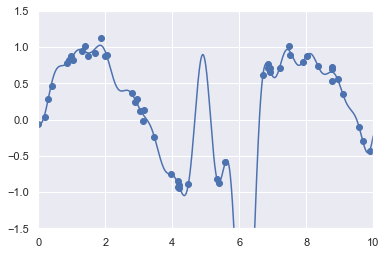

In [24]:
model = make_pipeline(GaussianFeatures(30),
                     LinearRegression())

model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

$$\text{图5-47：一个过度复杂的模型对数拟合}$$

如果将数据投影到30维的基函数上，模型就会变得过于灵活，从而能够适应数据中不同位置的异常值。如果将高斯基函数的系数画出来，就可以看到过拟合的原因(如图5-48所示)：

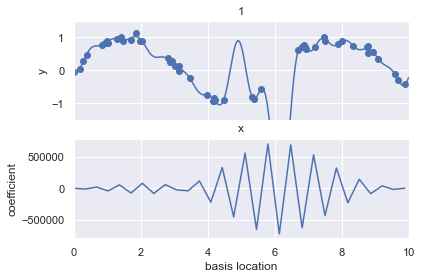

In [29]:
def basis_plot(model, title = None):
    fig, ax = plt.subplots(2, sharex = True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel = 'x', ylabel = 'y', ylim = (-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
        ax[1].plot(model.steps[0][1].centers_,
                  model.steps[1][1].coef_)
        ax[1].set(xlabel = 'basis location',
                 ylabel = 'coefficient',
                 xlim = (0, 10))
        
model = make_pipeline(GaussianFeatures(30),
                     LinearRegression())
basis_plot(model, 1)

$$\text{图5-48：过度复杂的模型中高斯基函数的系数}$$

图5-48下面那幅图显示了每个位置上基函数的振幅。当基函数重叠的时候，通常就表面出现了过拟合：相邻基函数的系数相互抵消。这显然是有问题的，如果对较大的模型参数进行惩罚(penalize)，从而抑制模型剧烈波动，应该就可以解决这个问题了。这个惩罚机制被称为正则化(regularization)，有几种不同的表现形式。   

1. **岭回归($L_2$范数正则化)**    

正则化最常见的形式可能就是岭回归(ridge regression，或者$L_2$范数正则化)，有时也被称为吉洪诺夫正则化(Tikhonov regularization)。其处理方法是对模型系数平方和($L_2$范数)进行惩罚，模型拟合的惩罚想为：
$$P = \alpha\sum_{n=1}^N{\theta_n^2}$$
其中，$\alpha$是一个自由参数，用来控制惩罚的力度。这种带惩罚项的模型内置在Scikit-Learn的Ridge评估器中(如图5-49所示)：

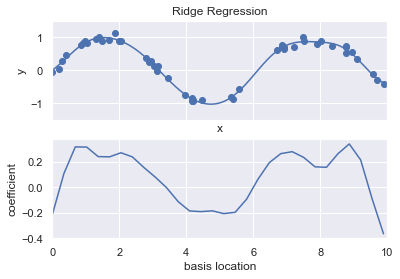

In [30]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha = 0.1))
basis_plot(model, title = 'Ridge Regression')

$$\text{图5-49：岭回归($L_2$范数)正则化复杂的模型(与图5-48对比)}$$

参数$\alpha$是控制最终模型复杂度的关键。如果$\alpha\rightarrow 0$，那么模型就恢复到标准线性回归结果；如果$\alpha\rightarrow\infty$，那么所有模型都会被压制，岭回归的一个重要优点是，它可以非常高效地计算——因此相比原始的线性回归模型，几乎没有消耗更多的资源。   

2. **Lassso正则化($L_1$范数正则化)**    

另一种常用的正则化被称为Lasso，其处理方法是对模型系数绝对值的和($L_1$范数)进行惩罚：
$$P = \alpha\sum_{n=1}^N{|\theta_n|}$$
虽然它在形式上非常接近岭回归，但是其结果与岭回归差别很大。例如，由于其几何特性，Lasso正则化倾向于构建稀疏模型：也就是说，它更喜欢将模型系数设置为0.   
可以看到如图5-49所示的结果，但是用模型系数的$L_1$范数正则化实现的(如图5-50所示)：

C:\Users\dowjohn\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002135815870486668, tolerance: 0.002065280097246271
  positive)


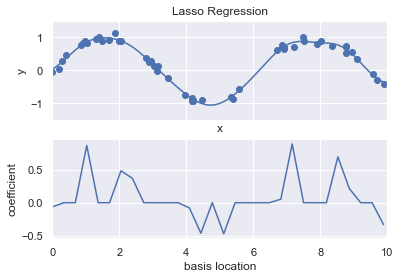

In [33]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha = 0.001))
basis_plot(model, title = 'Lasso Regression')

$$\text{图5-50：Lasso($L_1$范数)正则化处理过度复杂的模型(与图5-48对比)}$$   

通过Lasso回归惩罚，大多数基函数的系数都变成了0，所以模型变成了原来基函数的一个小部分。与岭回归正则化类似，参数$\alpha$控制惩罚力度，可以通过交叉验证来确定(详见5.3节)。

### 5.6.4 案例：预测自行车流量    

下面来尝试预测美国西雅图西雅图弗雷蒙特桥的自行车流量，数据源自不同天气、季节和其他条件下通过该桥的自行车统计数据。我们在3.12节见过这些数据。   
在本节中，我们两自行车数据与其他数据集连接起来，确定哪些天气和季节因素(温度、降雨量和白昼时间)会影响通过这座桥的自行车流量。NOAA已经提供了每日的站点天气预报(<http://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND>)数据(我用的站点ID是USW00024233。**注：** 两份数据下载地址为(<https://github.com/jakevdp/SeattleBike/find/master>))，可以用Pandas轻松将两份数据连接起来。然后，创建一个简单的线性回归模型来探索与自行车相关的天气和其他因素，从而评估任意一种因素对骑车人数的影响。   
值得注意的是，这是一个演示在统计模型框架中如何应用Scikit-Learn工具的案例，模型参数被假设为具有可以解释的含义。就像前面介绍过的那样，虽然这并不是一个介绍标准机器学习方法的案例，但是对模型的解释在其他模型中也会用到。   
首先加载两个数据集，用日期作索引：

In [35]:
import pandas as pd
counts = pd.read_csv('D:\\Python\\Python Project\\Python_Data_Science_Handbook-master\\data\\FremontHourly.csv',
                    index_col = 'Date', parse_dates = True)
weather = pd.read_csv('D:\\Python\\Python Project\\Python_Data_Science_Handbook-master\\data\\SeaTacWeather.csv',
                     index_col = 'DATE', parse_dates = True)

然后计算每一天的自行车流量，将结果放到一个新的DataFrame中：

In [38]:
# daily = count.resamply('d', how = 'sum')   # how选项已经废止，用resample().sum()替代

daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis = 1)
daily = daily[['Total']]   # remove other columns

在之前的分析中，我们发现同一周内每一天的模式是不一样的。因此，我们在数据中加入7列0-1表示星期几：

In [39]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

我们觉得骑车人数在节假日也有所变化。因此，再增加一列表示当天是否为节假日：

In [41]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index = holidays, name = 'holiday'))
daily['holiday'].fillna(0, inplace = True)

我们还认为白昼时间也会影响骑车人数。因此，用标准的天文计算来添加这列信息(如图5-51所示)：

C:\Users\dowjohn\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


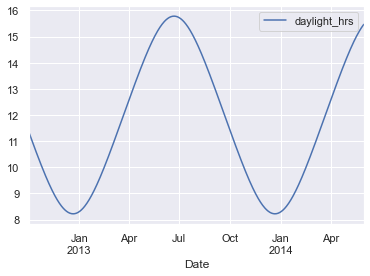

In [42]:
def hours_of_daylight(date, axis = 23.44, latitude = 47.61):
    '''计算指定日期的白昼时间'''
    days = (date - pd.datetime(2000, 12, 21)).days
    #  FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. 
    # Import from datetime module instead.
    m = (1. - np.tan(np.radians(latitude))
        * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()

$$\text{图5-51：西雅图数据白昼时间可视化}$$   

我们还可以增加每一天的平均气温和总降雨量。除了降雨量的数值之外，再增加一个标记表示是否下雨(是否降雨量为0)：

In [43]:
# 温度是按照1/10摄氏度统计的，首先转换为摄氏度
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp(C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# 降雨量也是按照1/10mm统计的，转化为英寸
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp(C)', 'dry day']])

最后，增加一个从1开始递增的计数器，表示以便已经过去了多少天。这个特征可以让我们看到每一年自行车流量的增长数或减少：

In [45]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

数据已经准备就绪，来看看前几行：

In [48]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp(C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-02,1938.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.335681,0.0,13.90,1,0.000000
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1,0.002740
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1,0.005479
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1,0.008219
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1,0.010959


有了这些数据之后，就可以选择需要使用的列，然后对数据建立线性回归模型。我们不在模型中使用截距，而是设置fit_intercept = False，因为每一天的总流量(Total字段)基本上可以作为当天的截距(**注：** 其实词线性回归模型使用截距，集设置fit_intercept = True，拟合结果也不变。)：

In [49]:
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
               'daylight_hrs', 'PRCP', 'dry day', 'Temp(C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept = False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

最后，对比自行车真实流量(Total字段)与预测流量(predicted)字段(如图5.52所示)：

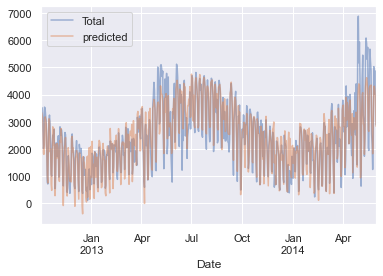

In [50]:
daily[['Total', 'predicted']].plot(alpha = 0.5);

$$\text{图5-52：回归模型预测的自行车流量}$$   

显然，我们丢失了一些关键特征，尤其是夏天的预测数据。要么是由于特征没有收集全(即可能还有其他因素会影响人们是否骑车)，要么是有一些非线性关系我们没有考虑(例如，可能人们在温度过高或过低时都不愿意骑车)。但是，这个近似解已经足以说明问题。下面我们看看模型的系数，评估各个特征对每日自行车流量的影响：

In [51]:
params = pd.Series(model.coef_, index = X.columns)
params

Mon              265.779104
Tue              306.551668
Wed              359.247220
Thu              199.486334
Fri              -93.133822
Sat            -1276.752727
Sun            -1308.178141
holiday        -1190.062935
daylight_hrs     137.183312
PRCP            -662.551672
dry day          558.729470
Temp(C)           64.596364
annual           210.767214
dtype: float64

如果不对这些数据的不确定性进行评估，那么他们很难具有解释力。可以用自举重采样方法快速计算数据的不确定性：

In [52]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
             for i in range(1000)], 0)

有了估计误差之后，再来看这些结果：

In [56]:
print(pd.DataFrame({'effect':params.round(0),
                   'error':err.round(0)}))

              effect  error
Mon            266.0  128.0
Tue            307.0  128.0
Wed            359.0  124.0
Thu            199.0  127.0
Fri            -93.0  115.0
Sat          -1277.0  128.0
Sun          -1308.0  129.0
holiday      -1190.0  196.0
daylight_hrs   137.0   14.0
PRCP          -663.0   70.0
dry day        559.0   44.0
Temp(C)         65.0    5.0
annual         211.0   47.0


首先，星期特征是比较稳定的，工作日骑车的人数显然要比周末和节假日多。其次，白昼时间每增加1小时，就平均增加137$\pm$14个骑车的人；而温度没上升1度，则增加65$\pm$5个骑车的人；如果那天没有下雨，那么骑车人数增加559$\pm$44人；降雨量没增加1英寸，骑车人数就减少559$\pm$44人。当所有影响因素都生效之后，一年中每多一天骑车人数增加(日环比增幅)211$\pm$47人。   
我们的模型的确丢失了一些重要信息。例如，变量的非线性影响因素(例如降雨和寒冷天气的影响)和非线性趋势(例如人们在温度过高或过低时可能都不愿意骑车)在模型中都没有体现出来。另外，我们丢掉了一些细颗粒度的数据(例如下雨天的早晨和下雨天的傍晚之间的差异)，还忽略了相邻日期彼此间的相关性(例如下雨的星期二对星期三骑车人数的影响，或者滂沱大雨之后意外的雨过天晴对骑车人数的影响)，这些都可能对骑车人数产生影响。现在你手上已经有了工具，如果愿意，可以进一步进行分析。

## 5.7 专题：支持向量机    

支持向量机(support vector machine, SVM)是非常强大、灵活的监督学习算法，既可以用于分类，也可以用于回归。在本节中，我们将介绍支持向量机的原理，并用它解决分类问题。首先还是导入需要用的程序库：

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 用Seaborn画图
import seaborn as sns; sns.set()

### 5.7.1 支持向量机的由来   

在前面介绍贝叶斯分类器(详见5.5节)时，我们首先对每个类进行了解随机分布的假设，然后用生成的模型估计新数据点的标签，那时生成分类方法，这里将介绍判别分类方法：不再为每类数据建模，而是用一条分割线(二维空间中的直线或曲线)或者流行体(多维空间中的曲线、曲面等概念的推广)将各种类型分割开。   
下面用一个简单的分类示例来演示，其中两种类型的数据可以被清晰地分割开(如图5-53所示)：

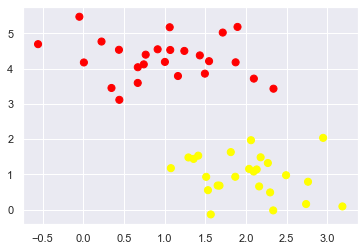

In [2]:
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
# FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. 
# The corresponding classes / functions should instead be imported from sklearn.datasets. 
# Anything that cannot be imported from sklearn.datasets is now part of the private API.
# warnings.warn(message, FutureWarning)
X, y = make_blobs(n_samples = 50, centers = 2,
                 random_state = 0, cluster_std = 0.60)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn');

$$\text{图5-53：简易分类数据}$$

这个线性判别分类器尝试画一条将数据分成两部分的直线，这样就构成了一个分类模型。对于上图的二维数据来说，这个任务其实可以手动完成。但是我们马上发现一个问题：在这两种类型之间，有不止一条直线可以将它们完美分割。   
可以把它们画出来看看(如图5-54所示)：

(-1.0, 3.5)

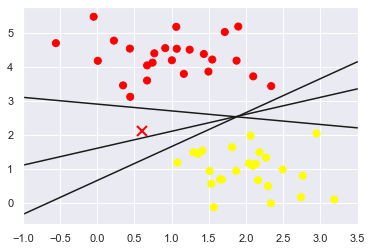

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plt.plot([0.6], [2.1], 'x', color = 'red', markeredgewidth = 2, markersize = 10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
    
plt.xlim(-1, 3.5)

$$\text{图5-54：三条完美的线性判别分类器}$$

虽然这三个不同的分割器都能完美地判别这些样本，但是悬着不同的分割线，可能会让新的数据点(例如图5-54中的"X"点)分配到不同的标签。显然"画一条分割不同类型的直线"还不够，我们需要进一步思考。

### 5.7.2 支持向量机：边界最大化    

支持向量机提供了改进这个问题的方法，它直观的解释是：不再画一条细线来区分类型，而是画一条到最近点边界、有宽度的线条。具体形式如下面的示例所示(如图5-55所示)：

(-1.0, 3.5)

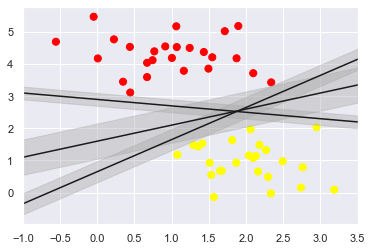

In [8]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none', color = '#AAAAAA',
                    alpha = 0.4)
    
plt.xlim(-1, 3.5)

$$\text{图5-55：带"边界"的判别分类器}$$   

在支持向量机中国，选择边界最大的那条线是模型最优解。支持向量机其实就是一个边界最大化评估器。

1. 拟合支持向量机   

来看看这个数据的真实拟合结果：用Scikit-Learn的支持向量机分类器在数据上训练一个SVM模型。这里用一个线性核函数，并将参数C设置为一个很大的数(后面会介绍这些设置的意义)：

In [5]:
from sklearn.svm import SVC  # 'Support vector classifier'
model = SVC(kernel = 'linear', C = 1E10)
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

为了实现更好的可视化分类效果，创建一个辅助函数画出SVM的决策边界(如图5-56所示)：

In [10]:
def plot_svc_decision_function(model, ax = None, plot_support = True):
    '''画二维SVC的决策函数'''
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 创建评估模型的网格
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # 画决策边界和边界
    ax.contour(X, Y, P, colors = 'k',
              levels = [-1, 0, 1], alpha = 0.5,
              linestyles = ['--', '-', '--'])
    
    # 画支持向量
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                  model.support_vectors_[:, 1],s = 300, 
                  linewidth = 1, facecolors = 'none')
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

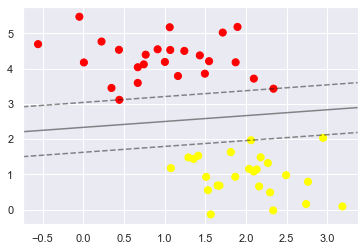

In [7]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plot_svc_decision_function(model)

$$\text{图5-56：带边界线(虚线)和支持向量(圆圈)的支持向量机分类器拟合数据结果}$$   

这就是两类数据间隔最大的分割线。你会发现有一些点正好就在边界线上，在图5-56中用黑圆圈表示。这些点是拟合的关键支持点，被称为支持向量，支持向量机算法也因此得名。在Scikit-Learn里面，支持向量的坐标存放在分类器的support_vectors_属性中：

In [11]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

分类器能够成功拟合的关键因素，就是这些支持向量的位置——任何在正确分类一侧远离边界线的点都不会影响拟合结果！从技术角度解释的话，是因为这些点不会对拟合模型的损失函数产生任何影响，所以只要它们没有跨越边界线，它们的位置和数量就都无关紧要。   
例如，可以画出数据集前60个点和前120个点的拟合结果，并进行对比(如图5-57所示)：

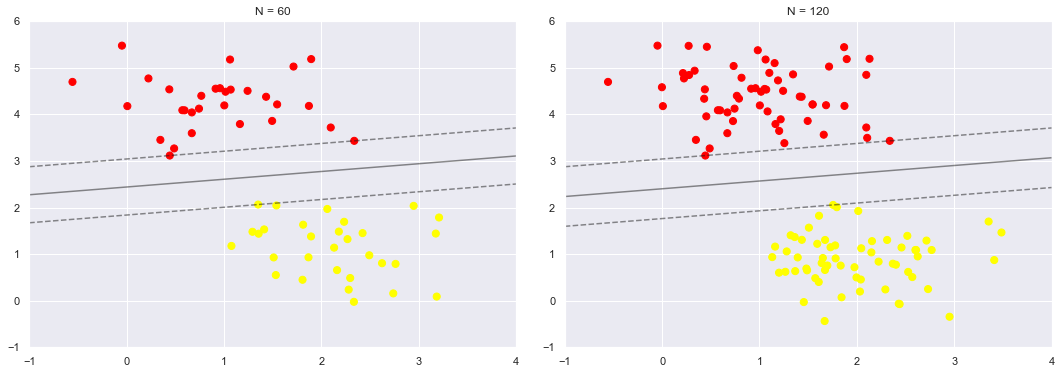

In [12]:
def plot_svm(N = 10, ax = None):
    X, y = make_blobs(n_samples = N, centers = 2,
                     random_state = 0, cluster_std = 0.60)
    X =  X[:N]
    y = y[:N]
    model = SVC(kernel = 'linear', C = 1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

$$\text{图5-57：新训练数据点对SVM模型的影响}$$

我们在左图中看到的60个训练样本的模型和支持向量。在右图中，虽然我们画了前120个训练样本的支持向量，但是模型并没有改变：左图中的3个支持向量仍然适用于右图。这种对远离边界的数据点不敏感的特点正是SVM模型的有点之一。   
如果你正在运行Notebook，可以用IPython的交互组件动态观察SVM模型的这个特点(如图5-58所示)：

In [13]:
from ipywidgets import interact, fixed
interact(plot_svm, N = [10, 200], ax = fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

$$\text{图5-58：SVM模型可视化的第一帧画面(详情请参考Github上的完整在线附录，<https://github.com/jakevdp/PythonDataScienceHandbook>)}$$

在SVM模型中，我们可以沿用同样的思路。为了应用核函数，引人一些非线性可分的数据(如图5-59所示)：

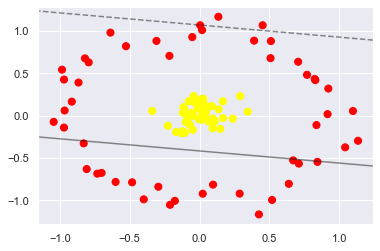

In [15]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor = 0.1, noise = 0.1)

clf = SVC(kernel = 'linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plot_svc_decision_function(clf, plot_support = False);

$$\text{图5-59：用线性分类器处理非线性边界的效果}$$

显然，这里需要非线性判别方法来分割数据。回顾一下5.6节介绍的基函数回归方法，想想如何将数据投影到高维空间，从而是线性分割器可以派上用场。例如，一种简单的投影方法是计算一个数据圆圈(middle clump)为中心的径向基函数：

In [16]:
r = np.exp(-(X ** 2).sum(1))

可以通过三维图来可视化新增的维度——如果你正在运行Notebook，就可以用滑块变换观察角度(如图5-60所示)：

In [17]:
from mpl_toolkits import mplot3d

def plot_3d(elev = 30, azim = 30, X = X, y = y):
    ax = plt.subplot(projection = '3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c = y, s = 50, cmap = 'autumn')
    ax.view_init(elev = elev, azim = azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
interact(plot_3d, elev = [-90, 90], azim = (-180, 180),
        X = fixed(X), y = fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

$$\text{图5-60：可以进行线性分割的第三个维度}$$    

增加新维度之后，数据变成了线性可分状态，如果现在画一个分割平面，例如$r=0.7$，即可将数据分割。   
我们还需要仔细选择和优化投影方式，如果不能将径向基函数集中到正确的位置，那么就得不到如此干净、可分割的结果。通常，选择基函数比较困难，我们需要让模型自动指出最合适的基函数。   
一种策略是计算基函数在数据集上每个点的变换结果，让SVM算法从所有结果中筛选出最优解。这种基函数变换方式被称为核变换，是基于每对数据点之间的相似度(或者核函数)计算的。   
这种策略的问题时，如果将$N$个数据点投影到$N$维空间，当$N$不断增大的时候就会出现维度灾难，计算量巨大。但由于核函数技巧(<http://bit/2fStZeA>)提供的小程序可以隐式计算核变换数据的拟合，也就是说，不需要建立完全的$N$维核函数投影空间！这个核函数技巧内置在SVM模型中，是使SVM方法如此强大的充分条件。   
在Scikit-Learn里面，我们可以应用核函数化的SVM模型将线性核转变为RB(径向基函数)核，设置kernel模型超参数即可(如图5-61所示)：

In [18]:
clf = SVC(kernel = 'rbf', C = 1E6)
clf.fit(X, y)

SVC(C = 1000000.0, cache_size = 200, class_weight = None, coef0 = 0.0,
   decision_function_shape = None, degree = 3, gamma = 'auto', kernel = 'rbf',
   max_iter = -1, probability = False, random_state = None, shrinking = True,
   tol = 0.001, verbose = False)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

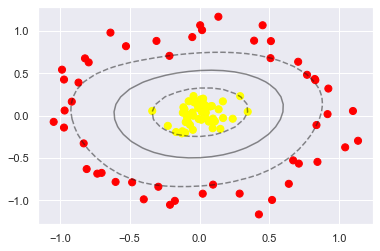

In [19]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s = 300, lw = 1, facecolors = 'none')

$$\text{图5-61：核函数化的SVM模型拟合数据}$$   

通过使用这个核函数化的支持向量机，我们找到了一条合适的非线性决策边界。在及其学习中，核变换策略经常用于将快速线性方法变换成快速非线性方法。尤其是对于那些可以应用核函数技巧的模型。   

3. SVM优化：软化边界   

到目前为止，我们介绍的模型都是在处理非常干净的数据集，里面都有非常完美的决策边界。但如果你的数据有一些重叠该怎么办？例如，有如下所示一些数据(如图5-62所示)：

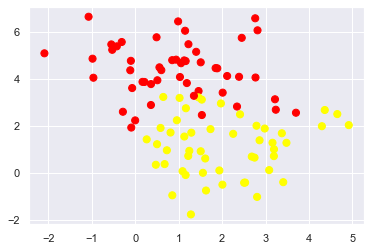

In [20]:
X, y = make_blobs(n_samples = 100, centers = 2,
                 random_state = 0, cluster_std = 1.2)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn');

$$\text{图5-62：有重叠的数据}$$  

为了解决这个问题，SVM实现了一些修正因子来"软化"边界。为了取得更好的拟合效果，它允许一些点位于边界线之内。边界线的硬度可以通过超参数进行控制，通常是$C$。如果C很大，边界就会很硬，数据点便不能在边界内"生存"；如果$C$比较小，边界线比较软，有一些数据点就可以穿越边界线。   
图5-63显示了不同参数$C$通过软化边界线，对拟合效果产生的影响：

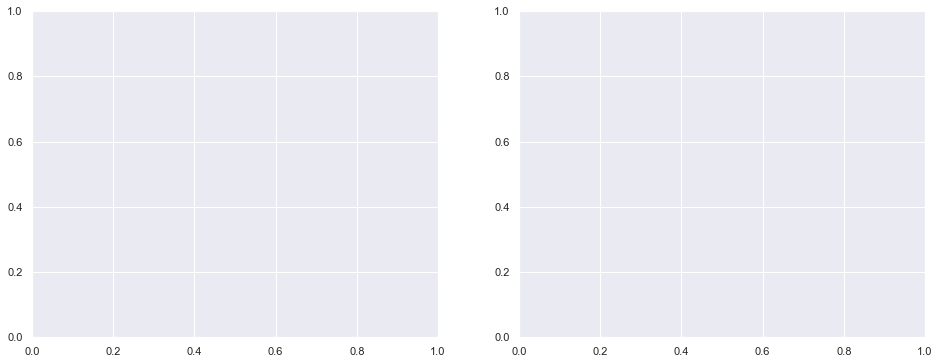

In [21]:
X, y = make_blobs(n_samples = 100, centers = 2, 
                 random_state = 0, cluster_std = 0.8)
fig. ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel = 'linear', C = C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s = 300, lw = 1, facecolors = 'none');
    axi.set_title('C = {0:.1f}'.format(C), size = 14)

$$\text{图5-63：不同参数$C$的支持向量机拟合效果}$$   

参数$C$的最优值视数据集的具体情况而定，通过交叉检验或类似的程序进行计算(详见5.3节)。

### 5.7.3 案例：人脸识别    

我们用人脸识别案例来演示支持向量机的实战过程。这里用Wild数据集中带标记的人脸图像，里面包含了数千张公开的人脸照片。Scikit-Learn内置了获取照片数据集的功能：

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)